# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Instrucciones para completar el proyecto

### **Paso 1.** Abre el archivo de datos y estudia la información general
Ruta de archivo: /datasets/games.csv

### **Paso 2.** Prepara los datos
 - Reemplaza los nombres de las columnas (ponlos en minúsculas).
 - Convierte los datos en los tipos necesarios.
 - Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
 - Si es necesario, elige la manera de tratar los valores ausentes:
    * Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    * ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    * Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
 - Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

### **Paso 3. Analiza los datos**

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
 - Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
 - Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
 - Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
 - ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
 - Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
 - Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
 - Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
 - Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

### **Paso 4.** Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:
 - Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
 - Los cinco géneros principales. Explica la diferencia.
 - Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### **Paso 5.** Prueba las siguientes hipótesis:
 - Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

 - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

 - Cómo formulaste las hipótesis nula y alternativa.

 - Qué criterio utilizaste para probar las hipótesis y por qué.

### **Paso 6.** Escribe una conclusión general
Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas `code` y las explicaciones de texto en las celdas `markdown`. Aplica formato y agrega encabezados.

## Descripción de datos
 - Name (Nombre)

 - Platform (Plataforma)

 - Year_of_Release (Año de lanzamiento)

 - Genre (Género) 

 - NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

 - EU_sales (ventas en Europa en millones de dólares estadounidenses) 

 - JP_sales (ventas en Japón en millones de dólares estadounidenses) 

 - Other_sales (ventas en otros países en millones de dólares estadounidenses) 

 - Critic_Score (máximo de 100) 

 - User_Score (máximo de 10) 

 - Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## 1. Abre el archivo de datos y estudia la información general

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import requests
import warnings
from datetime import datetime
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

Este DataFrame contiene 16715 entradas y 11 columnas, con un uso de memoria de aproximadamente 1.4 MB.

👾 Detalles de las columnas:
- Name: Contiene los nombres de los juegos, con 16713 valores no nulos.
- Platform: Indica la plataforma de juego, con todas las 16715 entradas completas.
- Year_of_Release: Representa el año de lanzamiento de los juegos, con 16446 valores no nulos.
- Genre: Especifica el género de los juegos, con 16713 valores no nulos.
- NA_sales: Refleja las ventas en América del Norte, todas las 16715 entradas tienen valores.
- EU_sales: Muestra las ventas en Europa, con todas las 16715 entradas completas.
- JP_sales: Muestra las ventas en Japón, todas las 16715 entradas tienen valores.
- Other_sales: Refleja las ventas en regiones distintas a NA, EU y JP, todas las 16715 entradas tienen valores.
- Critic_Score: Indica la puntuación dada por los críticos, con 8137 valores no nulos.
- User_Score: Representa la puntuación dada por los usuarios, con 10014 valores no nulos.
- Rating: Especifica la clasificación de los juegos, con 9949 valores no nulos.

👾 Se pueden realizar las siguientes correcciones y mejoras en el DataFrame:
1. Rellenar los valores faltantes en las columnas 'Year_of_Release', 'Critic_Score', 'User_Score' y 'Rating'.
2. Convertir el tipo de dato de 'User_Score' de objeto a float64 para facilitar cálculos.
3. Investigar y corregir posibles errores en los nombres de los juegos y las plataformas.
4. Normalizar los nombres de las columnas y los valores a minúsculas para mantener la consistencia en todo el DataFrame.


In [3]:
# Importar .csv
df_games = pd.read_csv(r'datasets\games.csv')

# Verificar valores del DataFrame
df_games.info()
df_games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## 2. Prepara los datos

🕹️ Se observan las siguientes discrepancias y áreas para mejorar en el DataFrame:

- Name: Al tener solo 2 valores faltantes en esta columna, lo más conveniente sería evaluar si estos valores son significativos para el análisis. En caso de no ser relevantes, se podría considerar eliminarlos del conjunto de datos para mantener la integridad de la información restante.
- Platform: No hay valores faltantes.
- Year_of_Release: Faltan 269 valores; se buscará el año de lanzamiento de las plataformas en la que fueron lanzados los videojuegos para reemplzar los valores ausentes.
- Genre: Hay 2 valores faltantes.
- NA_sales, EU_sales, JP_sales, Other_sales: No hay valores faltantes en las ventas por región.
- Critic_Score: Se realizará un análisis más detallado de los valores ausentes para determinar la mejor estrategia de manejo de datos.
- User_Score: Se llevará a cabo una investigación exhaustiva sobre los valores faltantes y se propondrá una solución para su corrección.
- Rating: Faltan 6766 valores; se buscará una fuente de datos externa para completarlos.

In [4]:
# Revisar si hay valores ausentes
print(df_games.isna().sum())


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


🔍 No se encontraron valores duplicados en el DataFrame. Esto sugiere que cada entrada en el conjunto de datos es única y no hay repeticiones de registros completos. Esta falta de duplicados facilita el análisis y la interpretación de los datos, ya que cada fila representa una observación única sin redundancias.


In [5]:
# Revisar si hay duplicados
print('Hay', df_games.duplicated().sum(), 'valores duplicados')


Hay 0 valores duplicados


🔍 Se convertirá todo el DataFrame a minúsculas, incluyendo los encabezados, para mejorar el análisis.

In [6]:
# Convertir todo el DataFrame en minusculas
df_games = df_games.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
df_games.columns = df_games.columns.str.lower()
df_games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## **Valores en la columna 'name'**

🔍 Se identificaron 2 filas con valores ausentes en la columna 'Name' y tambien ñps 2 valores ausentes de la columna 'Genre'. Dado que todos sus valores son ausentes y no son relevantes para el análisis, se procederá a eliminar estas filas del DataFrame.

In [7]:
# Ver las 2 filas con valores ausentes de 'name'
display(df_games[df_games['name'].isnull()])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# Eliminar las 2 filas con valores ausentes
df_games = df_games.dropna(subset=['name'])
df_games = df_games.reset_index(drop=True)

df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## **Valores en la columna 'year_of_release'**

🔍 Se identificaron 269 valores ausentes en la columna 'year_of_release'. Dado que es dificil de buscar el año de lanzamiento de cada uno de los años en lo que se lanzaron y ya se hizo la busqueda por una API pero al no tener una relacion en los nombres de los videojuegos se decidio usar el año de lanzamiento de la plataforma en la que fueron lanzados, por lo que en este caso vemos que solo son 16 consolas las que tenemos que buscar a comparacion de los 269 vieojuegos.

In [9]:
# Crear DataFrame con los juegos que tienen 'year_of_release' con valor ausente
games_miss_year = df_games.query('year_of_release.isnull()')[['name', 'platform']]
print(games_miss_year['platform'].unique())
display(games_miss_year)


['ps2' 'wii' '2600' 'x360' 'gba' 'pc' 'ps3' 'ps' 'psp' 'xb' 'gb' 'ds' 'gc'
 '3ds' 'n64' 'psv']


,name,platform
183,madden nfl 2004,ps2
377,fifa soccer 2004,ps2
456,lego batman: the videogame,wii
475,wwe smackdown vs. raw 2006,ps2
609,space invaders,2600
...,...,...
16371,pdc world championship darts 2008,psp
16403,freaky flyers,gc
16446,inversion,pc
16456,hakuouki: shinsengumi kitan,ps3


🖥️ Se hizo la investigacion de los años en los que fueron lanzadas las plataformas de los vidojuegos que tienen vlores ausentes y este fue el resultado:

  - PS2 = 2000
  - Wii = 2006
  - 2600 = 1977
  - X360 = 2005
  - GBA = 2001
  - PC = ?
  - PS3 = 2006
  - PS = 1994
  - PSP = 2005
  - XB = 2001
  - GB = 1989
  - DS = 2004
  - GC = 2001
  - 3DS = 2011
  - N64 = 1996
  - PSV = 2011

La plataforma PC, su año es incierto ya que hay videojuegos que fueron creados desde 1962 hasta la fecha por ahora los dejaremos como valores ausentes para despues hacer una conclusion de como podemos manejarlos.


In [10]:
# Agregar año de lanzamiento de las plataformas al DataFrame 'games_miss_year'
platforms_year = {'platform': ['ps2', 'wii', '2600', 'x360', 'gba', 'ps3', 'ps', 'psp', 'xb', 'gb', 'ds', 'gc', '3ds', 'n64', 'psv'],
                'platform_year': [2000, 2006, 1977, 2005, 2001, 2006, 1994, 2005, 2001, 1989, 2004, 2001, 2011, 1996, 2011]
                }

# Crear un DataFrame con el nombre de las plataformas y el año de lanzamiento
df_platforms_year = pd.DataFrame(platforms_year)

# Agregar columna 'platforms_year' a nuestro DataFrame
games_miss_year['platform_year'] = games_miss_year['platform'].map(df_platforms_year.set_index('platform')['platform_year'])

games_miss_year.info()
display(games_miss_year.head())



<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 183 to 16520
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           269 non-null    object 
 1   platform       269 non-null    object 
 2   platform_year  252 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


,name,platform,platform_year
183,madden nfl 2004,ps2,2000.0
377,fifa soccer 2004,ps2,2000.0
456,lego batman: the videogame,wii,2006.0
475,wwe smackdown vs. raw 2006,ps2,2000.0
609,space invaders,2600,1977.0


In [11]:
# Funcion para llenar los valores ausentes de df_games en la columna 'year_of_release'
def fill_missing_year(row):
    if pd.isna(row['year_of_release']):
        match = games_miss_year[(games_miss_year['name'] == row['name']) & (games_miss_year['platform'] == row['platform'])]
        if not match.empty:
            return match.iloc[0]['platform_year']
    return row['year_of_release']

# Aplicar funcion
df_games['year_of_release'] = df_games.apply(fill_missing_year, axis=1)

df_games.info()
display(df_games)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16696 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


🔍 Los valores ausentes que dejamos son los videojuegos lanzados en la plataforma de PC, estos son 17 valores ausentes, si los eliminamos no nos afectara a nuestro analisis mas adelante.

In [12]:
# Eliminar filas con valores ausentes
df_games = df_games.dropna(subset='year_of_release')
df_games = df_games.reset_index(drop=True)

df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y').dt.year

df_games.info()
display(df_games.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16696 entries, 0 to 16695
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16696 non-null  object 
 1   platform         16696 non-null  object 
 2   year_of_release  16696 non-null  int32  
 3   genre            16696 non-null  object 
 4   na_sales         16696 non-null  float64
 5   eu_sales         16696 non-null  float64
 6   jp_sales         16696 non-null  float64
 7   other_sales      16696 non-null  float64
 8   critic_score     8121 non-null   float64
 9   user_score       9999 non-null   object 
 10  rating           9932 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## **Valores en la columna 'rating'**

🏰
  - Verificamos los valores unicos en la columna 'rating' para saber cual es la clasificacion que se utiliza.
  - La clasificacion se usa es la ESRB.
  - Se observa que hay clasificaciones que en la actualidad ya no se usan como la clasificacion K-A (Kids to Adults) por lo que se procedera hacer el cambio correspondiente.
  - Se observa que la clasificacion EC (Early Childhood) ya esta descontinuada pero se procedera a dejarla intacta ya que son solo poos juegos dentro de esa clasificacion.
  - Hay 6766 valores nulos los cuales se procedera a rellenar con la Clasificacion RP (Rating Pending).
  - La columna se llama 'raiting' pero para dar mayor informacion de que clasificacion se esta usando se pocedera a cambiar a 'esrb_rating' para no confundirlo con otras clasificaciones como la PEGI (Europa), CERO (Japon) o ACB (Australia).

In [13]:
# Verificar los valores unicos de la columna 'raiting'
df_games['rating'].unique()


array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

# Clasificaciones ESRB actuales
- E
    - Everyone
    - El contenido es generalmente adecuado para todas las edades.
- E10+
    - Everyone 10+
    - El contenido es generalmente adecuado para personas de 10 años en adelante.
- T
    - Teen
    - El contenido es generalmente adecuado para personas de 13 años en adelante.
- M
    - Mature 17+
    - El contenido es generalmente adecuado para personas de 17 años en adelante.
- AO
    - Adultos Only 18+
    - Contenido adecuado solo para adultos de 18 años en adelante.
- RP
    - Rating Pending
    - Aún no se ha asignado una clasificación final de ESRB.
- RP17+
    - Rating Pending 17+
    - Aún no se ha asignado una clasificación final de ESRB, pero se anticipa que será clasificado como Maduros 17+.

# Clasificaciones ESRB de 1994
- EC
    - Early Chilhood
    - Contenido que puede ser adecuado para personas de tres años en adelante.
- K-A
    - Kids to Adults
    - El contenido es generalmente adecuado para todas las edades.  


La clasificacion EC se dejo de usar en 2018 ya que habia pocos titulos que la tenian.  
La clasificacion K-A fue cambiado oficialmente a E (Everyone) en 1998.

In [14]:
# Verificar cuantos juegos estan clasificados con 'K-A'
print(len(df_games[df_games['rating'] == 'k-a']))


3


In [15]:
# Reemplazar la clasificacion 'K-A' con 'E'
df_games['rating'] = df_games['rating'].replace('k-a', 'e')

print(df_games['rating'].unique())
display(df_games[df_games['rating'].isna()])


['e' nan 'm' 't' 'e10+' 'ao' 'ec' 'rp']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16691,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16692,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16693,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16694,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# Reemplazar valores ausentes en la columna 'rating'
df_games['rating'] = df_games['rating'].fillna('rp')

print(df_games['rating'].unique())
df_games.info()


['e' 'rp' 'm' 't' 'e10+' 'ao' 'ec']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16696 entries, 0 to 16695
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16696 non-null  object 
 1   platform         16696 non-null  object 
 2   year_of_release  16696 non-null  int32  
 3   genre            16696 non-null  object 
 4   na_sales         16696 non-null  float64
 5   eu_sales         16696 non-null  float64
 6   jp_sales         16696 non-null  float64
 7   other_sales      16696 non-null  float64
 8   critic_score     8121 non-null   float64
 9   user_score       9999 non-null   object 
 10  rating           16696 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [17]:
# Cambiar nombre a la columna 'raiting' por 'esrb_raiting'
df_games.rename(columns={'rating': 'esrb_rating'}, inplace=True)

df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16696 entries, 0 to 16695
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16696 non-null  object 
 1   platform         16696 non-null  object 
 2   year_of_release  16696 non-null  int32  
 3   genre            16696 non-null  object 
 4   na_sales         16696 non-null  float64
 5   eu_sales         16696 non-null  float64
 6   jp_sales         16696 non-null  float64
 7   other_sales      16696 non-null  float64
 8   critic_score     8121 non-null   float64
 9   user_score       9999 non-null   object 
 10  esrb_rating      16696 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


## **Valores en las columnas de 'score'**

🧟
  - Se observa que la columna `critic_score` es un puntaje de 0 a 100 mientras que la de `user_score` es de 0 a 10.
  - En la columna `user score` hay valores con el strin 'tbd' que lo mejor seria dejarlos como valores ausentes.
  - Usaremos la calificacion de 0 a 10 para ambas columnas.
  - La columna `critic_score` tiene 51.36 % de valores ausentes.
  - La columna`user_score`tiene 40.11 % de valores ausentes.
  - Ambas columnas es mejor dejarlas asi para que no afecte los datos y pueda sesgar nuestro analisis

In [18]:
# Verificar valores unicos en cada columna
print(df_games['critic_score'].unique())
print()
print(df_games['user_score'].unique())


[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [19]:
# Dividir los valores de la columna 'critic_score' para unificar puntajes con 'user_score'
df_games['critic_score'] = df_games['critic_score'] / 10

# Trabajar los valores 'tbd' como ausentes en la columna'user_score'
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float')

print(df_games['critic_score'].unique())
print()
print(df_games['user_score'].unique())
display(df_games.head())


[7.6 nan 8.2 8.  8.9 5.8 8.7 9.1 6.1 9.7 9.5 7.7 8.8 8.3 9.4 9.3 8.5 8.6
 9.8 9.6 9.  8.4 7.3 7.4 7.8 9.2 7.1 7.2 6.8 6.2 4.9 6.7 8.1 6.6 5.6 7.9
 7.  5.9 6.4 7.5 6.  6.3 6.9 5.  2.5 4.2 4.4 5.5 4.8 5.7 2.9 4.7 6.5 5.4
 2.  5.3 3.7 3.8 3.3 5.2 3.  3.2 4.3 4.5 5.1 4.  4.6 3.9 3.4 3.5 4.1 3.6
 2.8 3.1 2.7 2.6 1.9 2.3 2.4 2.1 1.7 2.2 1.3]

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.6,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,rp
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.2,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,rp


In [20]:
# Ver el porcentaje de valores ausentes en ambas columnas
print('La columna ¨critic_score¨ tiene', np.round((df_games['critic_score'].isna().sum() / len(df_games['critic_score'])) * 100, 2), '% de valores ausentes')
print()
print('La columna ¨user_score¨ tiene', np.round((df_games['user_score'].isna().sum() / len(df_games['user_score'])) * 100, 2), '% de valores ausentes')


La columna ¨critic_score¨ tiene 51.36 % de valores ausentes

La columna ¨user_score¨ tiene 54.63 % de valores ausentes


## **Duplicados implicitos**

El objetivo es verificar que no existan duplicados implicitos en el DataFrame, ya que vimos que no existen explicitos con `duplicated` 

In [21]:
# Verificar nuevamente si hay duplicados en el DataFrame
print('Hay', df_games.duplicated().sum(), 'duplicados en el DataFrame')
print()
# Verificar los valores unicos por columnas del DataFrame
print(df_games.nunique())


Hay 0 duplicados en el DataFrame

name               11556
platform              31
year_of_release       38
genre                 12
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          82
user_score            95
esrb_rating            7
dtype: int64


# **Duplicados implicitos en la columna 'name'**

In [22]:
# Buscar duplicados implicitos verificando las columnas de nombre y plataforma
print('Hay', df_games.duplicated(subset=['name', 'platform']).sum(), 'duplicados implicitos en el DataFrame')

# Mostrar los duplicados implicitos
display(df_games[df_games.duplicated(subset=['name', 'platform'], keep=False)])


Hay 4 duplicados implicitos en el DataFrame


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.00,0.23,8.3,5.5,e
1188,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,8.3,8.5,t
1589,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,8.3,8.5,t
1743,sonic the hedgehog,ps3,2006,platform,0.41,0.06,0.04,0.66,4.3,4.1,e10+
4125,sonic the hedgehog,ps3,2006,platform,0.00,0.48,0.00,0.00,4.3,4.1,e10+
5968,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.00,0.04,8.2,8.5,t
11705,need for speed: most wanted,pc,2012,racing,0.00,0.06,0.00,0.02,8.2,8.5,t
16213,madden nfl 13,ps3,2012,sports,0.00,0.01,0.00,0.00,8.3,5.5,e


🔍 Se sumaran ambos valores de los duplicados implicitos que se encontraron, en el caso de "Madden NFL 13" y "Sonic The Hedgehog" se hara la suma de cada una de las ventas por region; en el caso de "Need for Speed: Most Wanted" se hara los mismo pero se dejara el del año 2012, ya que es la fecha de lanzamiento oficial.

In [23]:
# Sumar valores de 'Madden NFL 13'
df_games.loc[604, 'eu_sales'] += df_games.loc[16213, 'eu_sales']

# Sumar valores de 'Need for Speed: Most Wanted' de 'Xbox 360'
df_games.loc[1188,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] += df_games.loc[1589,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

# Sumar valores de 'Sonic The Hedgehog'
df_games.loc[1743, 'eu_sales'] += df_games.loc[4125, 'eu_sales']

# Sumar valores de 'Need for Speed: Most Wanted' de 'PC' 
df_games.loc[5968, ['eu_sales', 'other_sales']] += df_games.loc[11705, ['eu_sales', 'other_sales']]

# Eliminar indices duplicados
df_games = df_games.drop([16213, 1589, 4125, 11705])
df_games = df_games.reset_index(drop=True)

# Mostrar si se elimnaron los duplicados
display(df_games[df_games.duplicated(subset=['name', 'platform'], keep=False)])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating


# **Duplicados implicitos en la columna 'platform'**

🎮 **Análisis de la Distribución de Juegos entre Plataformas:**

A partir de esta información, se puede observar la distribución de los juegos entre diferentes plataformas.

Se pueden identificar las plataformas más populares en el conjunto de datos y obtener información sobre la cantidad de juegos disponibles para cada una de ellas. Esto puede ser útil para comprender la popularidad de las diferentes plataformas en la industria de los videojuegos.

Esta información puede ser útil para comprender la distribución de los juegos entre diferentes plataformas y para identificar las plataformas más populares en el conjunto de datos. Esto puede ayudar en la toma de decisiones relacionadas con el desarrollo y la distribución de juegos en diferentes plataformas.


In [24]:
# Contar valores en la columna 'platform'
print(df_games['platform'].value_counts(dropna=False))


platform
ps2     2161
ds      2151
ps3     1329
wii     1320
x360    1261
psp     1209
ps      1197
pc       956
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: count, dtype: int64


# **Duplicados implicitos en la columna 'year_of_release'**

🔍 La columna `year_of_release` muestra el recuento de juegos lanzados por año desde 1977 hasta 2016.

Se observa que el número de juegos lanzados aumenta con el tiempo, con un aumento significativo a partir de mediados de la década de 1990. Esto puede indicar un crecimiento en la industria de los videojuegos durante ese período. También se pueden identificar algunos picos en el número de lanzamientos en ciertos años, lo que podría estar relacionado con el lanzamiento de consolas populares o la llegada de nuevos géneros de juegos.

Esta información puede ser útil para comprender la evolución de la industria de los videojuegos a lo largo del tiempo y para identificar tendencias y patrones en el lanzamiento de nuevos juegos.


In [25]:
# Contar valores en la columna 'year_of_release'
df_games['year_of_release'].value_counts(dropna=False).sort_index()


year_of_release
1977      17
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      18
1990      16
1991      41
1992      43
1993      60
1994     128
1995     219
1996     266
1997     289
1998     379
1999     338
2000     384
2001     528
2002     829
2003     775
2004     792
2005     984
2006    1064
2007    1197
2008    1427
2009    1426
2010    1255
2011    1145
2012     651
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64

# **Duplicados implicitos en la columna 'genre'**

🔍 Al observar los resultados obtenidos, se puede notar que los géneros de `acción` y `deportes` son los más representados en el conjunto de datos, con `3365` y `2347` juegos respectivamente. Esto sugiere que estos géneros son populares y tienen una presencia significativa en la industria de los videojuegos.

Por otro lado, los géneros de `estrategia` y `rompecabezas` tienen recuentos más bajos en comparación con los géneros de `acción` y `deportes`. Esto puede indicar que estos géneros son menos comunes o menos populares en el conjunto de datos.

Este análisis proporciona una comprensión rápida de la distribución de los juegos entre diferentes géneros, lo que puede ser útil para identificar tendencias en la industria de los videojuegos y para tomar decisiones relacionadas con el desarrollo y la distribución de juegos.


In [26]:
# Contar valores en la columna 'genre'
df_games['genre'].value_counts(dropna=False)


genre
action          3365
sports          2347
misc            1748
role-playing    1497
shooter         1320
adventure       1303
racing          1244
platform         887
simulation       873
fighting         848
strategy         680
puzzle           580
Name: count, dtype: int64

# **Duplicados implicitos en la columna 'esrb_rating'**

Al revisar los datos de clasificación ESRB (Entertainment Software Rating Board), se observa que la clasificación `RP` (Rating Pending) es la más común, con un total de `6765` juegos en esa categoría. Esto podría indicar que muchos juegos en el conjunto de datos aún no han recibido una clasificación definitiva en el momento de la recopilación de datos.

Entre las clasificaciones establecidas, la categoría `E` (Everyone) es la siguiente más grande, con `3990` juegos, seguida por `T` (Teen) con `2955` juegos y `M` (Mature) con `1556` juegos. La clasificación `E10+` (Everyone 10 and older) también tiene una presencia significativa, con `1417` juegos.

Es interesante notar que las clasificaciones menos comunes son `EC` (Early Childhood) con solo `8` juegos y `AO` (Adults Only) con solo `1` juego. Esto sugiere que la mayoría de los juegos en el conjunto de datos están dirigidos a audiencias más amplias, mientras que los juegos dirigidos específicamente a audiencias muy jóvenes o maduras son menos comunes.

Este análisis proporciona una visión general de las clasificaciones ESRB presentes en el conjunto de datos, lo que puede ser útil para comprender la distribución de contenido por edad y audiencia en la industria de los videojuegos.


In [27]:
# Contar valores en la columna 'esrb_rating'
df_games['esrb_rating'].value_counts(dropna=False)


esrb_rating
rp      6765
e       3990
t       2955
m       1556
e10+    1417
ec         8
ao         1
Name: count, dtype: int64

## **Verificar si el DataFrame 'df_games' esta listo para el analisis**

  - **Creación de una columna de ventas totales:** Se calcula la suma total de ventas en diferentes regiones (América del Norte, Europa, Japón y otras) y se agrega como una nueva columna llamada total_sales al DataFrame.

In [28]:
# Crear columna con la suma total de ventas
total_sales = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.insert(value=total_sales, loc=8, column='total_sales')

In [29]:
# Verificar valores ausentes, duplicados en el DataFrame
print('Informacion del DataFrame:')
df_games.info()
print()
print('Valores ausentes del DataFrme:')
print(df_games.isna().sum())
print()
print('Valores duplicados del DataFrame:')
print(df_games.duplicated().sum())
print()
print('Primeras filas del DataFrame:')
display(df_games.head())
print()
print('Ultimas filas del DataFrame:')
display(df_games.tail())



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692 entries, 0 to 16691
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16692 non-null  object 
 1   platform         16692 non-null  object 
 2   year_of_release  16692 non-null  int32  
 3   genre            16692 non-null  object 
 4   na_sales         16692 non-null  float64
 5   eu_sales         16692 non-null  float64
 6   jp_sales         16692 non-null  float64
 7   other_sales      16692 non-null  float64
 8   total_sales      16692 non-null  float64
 9   critic_score     8117 non-null   float64
 10  user_score       7571 non-null   float64
 11  esrb_rating      16692 non-null  object 
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB

Valores ausentes del DataFrme:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sal

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,esrb_rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,82.54,7.6,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,rp
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,35.52,8.2,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,32.77,8.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,rp



Ultimas filas del DataFrame:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,esrb_rating
16687,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,0.01,NaN,NaN,rp
16688,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,0.01,NaN,NaN,rp
16689,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,0.01,NaN,NaN,rp
16690,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,0.01,NaN,NaN,rp
16691,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,0.01,NaN,NaN,rp


## 3. Analiza los datos

  - Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

  - Años Iniciales (1977-1989):
    - Durante los primeros años, el número de juegos lanzados fue relativamente bajo.
    - Los datos de estos años pueden no ser significativos debido a la novedad de la industria y la limitada disponibilidad de plataformas.
  - Años Intermedios (1990-2000):
    - La cantidad de juegos aumentó gradualmente.
    - Estos años marcaron el crecimiento de la industria y la diversificación de géneros y plataformas.
  - Años Recientes (2001-2016):
    - Hubo un aumento significativo en la producción de juegos. 
     
     
Estos datos son más representativos debido a la madurez de la industria y la proliferación de consolas y dispositivos.
En conclusión, aunque los primeros años pueden no ser tan significativos, los datos posteriores reflejan el auge y la evolución de la industria de los videojuegos. 🚀🎮

In [30]:
# Analizar el lanzamiento de los juegos por cada año
games_per_year = df_games.groupby('year_of_release')['name'].count()
games_per_year = games_per_year.reset_index()
games_per_year = games_per_year.rename(columns={'year_of_release': 'release_year', 'name': 'number_of_games'})
print(games_per_year)

    release_year  number_of_games
0           1977               17
1           1980                9
2           1981               46
3           1982               36
4           1983               17
5           1984               14
6           1985               14
7           1986               21
8           1987               16
9           1988               15
10          1989               18
11          1990               16
12          1991               41
13          1992               43
14          1993               60
15          1994              128
16          1995              219
17          1996              266
18          1997              289
19          1998              379
20          1999              338
21          2000              384
22          2001              528
23          2002              829
24          2003              775
25          2004              792
26          2005              984
27          2006             1064
28          20

# Tendencias en el Lanzamiento de Videojuegos (1977-2016)

El análisis presenta un resumen de los datos sobre el número de juegos lanzados cada año desde 1977 hasta 2016:

1. **Tendencias Generales:** Se observa un aumento constante en el número de juegos lanzados por año a lo largo del período analizado. Específicamente, se destaca un incremento significativo a partir de mediados de la década de 1990, lo que sugiere un crecimiento continuo y robusto en la industria de los videojuegos.

2. **Picos y Valles:** Se identifican varios picos y valles en la cantidad de juegos lanzados en diferentes años. Por ejemplo, se observa un pico en la década de 1990, especialmente entre 1995 y 2001, seguido de una disminución relativa en los años subsiguientes. Sin embargo, se evidencia un repunte hacia finales de la década de 2000 y principios de la década de 2010.

3. **Factores Influyentes:** Los cambios en el número de juegos lanzados pueden atribuirse a diversos factores, incluidos avances tecnológicos, cambios en las preferencias de los consumidores, ciclos económicos y estrategias empresariales. Estos elementos pueden influir en la producción y lanzamiento de nuevos juegos en la industria.

4. **Diversidad de la Industria:** El aumento en el número de juegos lanzados también refleja una mayor diversidad en la industria de los videojuegos. Se observa una amplia variedad de géneros, plataformas y modelos de negocio representados, lo que indica una industria dinámica y en constante evolución.

En resumen, estos datos proporcionan una visión integral del panorama cambiante de la industria de los videojuegos a lo largo de las décadas. El análisis revela tendencias significativas y ofrece información valiosa sobre el crecimiento y la diversificación de esta industria a lo largo del tiempo.


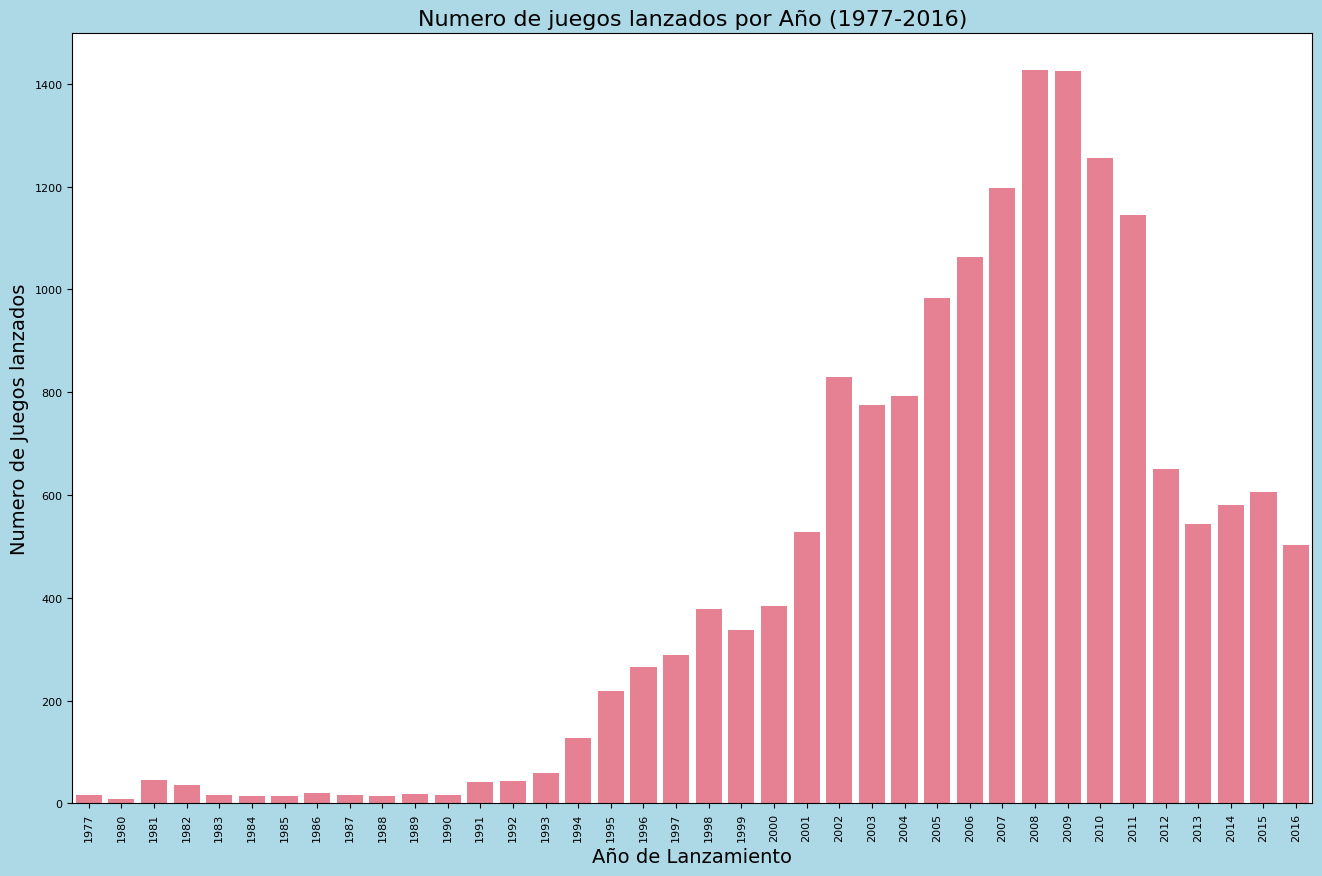

In [31]:
# Graficar el numero de juegos lanzados por año
sns.set_palette('husl')
plt.figure(figsize=(16,10), facecolor='lightblue')

sns.barplot(data=games_per_year, x='release_year', y='number_of_games')

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.xlabel('Año de Lanzamiento', fontsize=14)
plt.ylabel('Numero de Juegos lanzados', fontsize=14)
plt.title('Numero de juegos lanzados por Año (1977-2016)', fontsize=16)

plt.show()


Observa cómo varían las ventas de una plataforma a otra.

In [32]:
# Analizar las ventas totales por plataforma
games_per_platform = df_games.groupby('platform')['total_sales'].sum()
games_per_platform = games_per_platform.sort_values(ascending=False)
games_per_platform = games_per_platform.reset_index()

print(games_per_platform)


   platform  total_sales
0       ps2      1255.77
1      x360       971.42
2       ps3       939.65
3       wii       907.51
4        ds       806.12
5        ps       730.86
6       gba       317.85
7       ps4       314.14
8       psp       294.05
9       3ds       259.00
10       xb       257.74
11       pc       255.76
12       gb       255.46
13      nes       251.05
14      n64       218.68
15     snes       200.04
16       gc       198.93
17     xone       159.32
18     2600        96.98
19     wiiu        82.19
20      psv        54.07
21      sat        33.59
22      gen        28.35
23       dc        15.95
24      scd         1.86
25       ng         1.44
26       ws         1.42
27     tg16         0.16
28      3do         0.10
29       gg         0.04
30     pcfx         0.03


## Ventas Totales por Plataforma de Videojuegos (1977-2016)

Los datos proporcionan información sobre las ventas totales en millones de dólares por plataforma de videojuegos desde 1977 hasta 2016. Aquí hay un resumen de los hallazgos clave:

### Plataformas Principales:

- La plataforma más exitosa en términos de ventas totales es la **PlayStation 2 (PS2)**, con ventas totalizando **1255.77 millones de dólares**.
- Le sigue de cerca la **Xbox 360 (X360)**, con ventas por un total de **971.42 millones de dólares**.
- La **PlayStation 3 (PS3)** y la **Wii** también han sido plataformas significativas en términos de ventas, con **939.65 millones** y **907.51 millones de dólares**, respectivamente.

### Tendencias y Observaciones:

- Hay una clara dominancia de las plataformas de consola en los primeros lugares de la lista, indicando la popularidad duradera de las consolas de videojuegos.
- Las plataformas más recientes, como la **PlayStation 4 (PS4)** y la **Xbox One (XOne)**, están presentes en la lista, pero con ventas totales más bajas en comparación con sus predecesoras debido a que aun no cumplen su vida util.
- Plataformas más antiguas, como el **Nintendo Entertainment System (NES)** y la **Sega Genesis (GEN)**, también tienen ventas significativas, lo que sugiere el valor de los títulos clásicos en la industria de los videojuegos.

### Implicaciones y Conclusiones:

- Estos datos reflejan la evolución de la industria de los videojuegos a lo largo del tiempo, con cambios en la popularidad y el dominio de diferentes plataformas.
- Las ventas totales por plataforma proporcionan una medida útil del impacto y la importancia de cada plataforma en el mercado de los videojuegos.



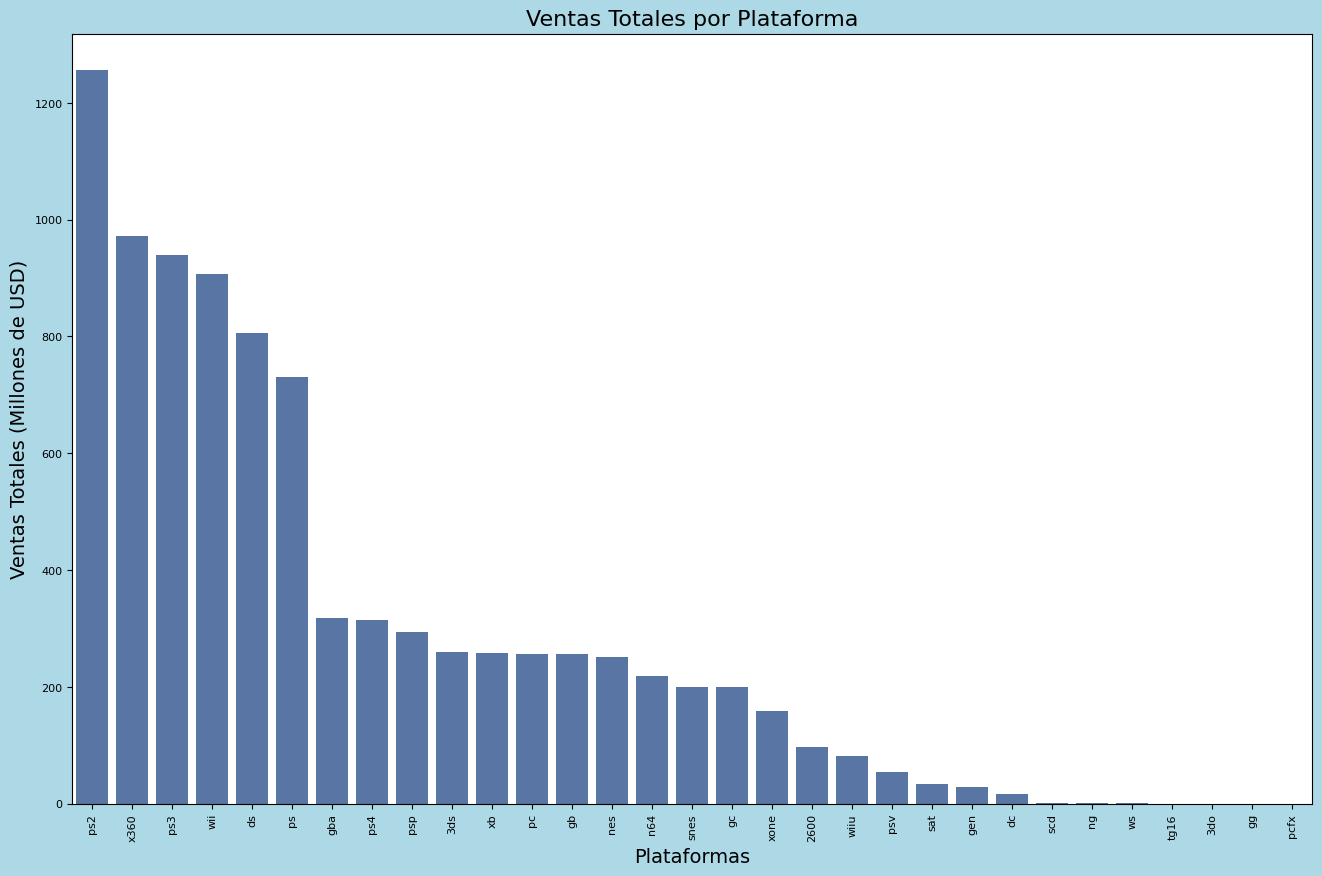

In [33]:
# Graficar la ventas totales por consola
sns.set_palette('deep')
plt.figure(figsize=(16,10), facecolor='lightblue')

sns.barplot(data=games_per_platform, x='platform', y='total_sales')

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.xlabel('Plataformas', fontsize=14)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize=14)
plt.title('Ventas Totales por Plataforma', fontsize=16)

plt.show()

Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

In [34]:
# Trabajar con las 10 plataformas con mas ventas
top_ten_platforms = games_per_platform.head(10)
display(top_ten_platforms)

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,3ds,259.00


# Análisis de las 10 Consolas con Mayores Ventas Totales

Este análisis se centra en las 10 consolas de videojuegos con las ventas totales más altas, según los datos proporcionados:

1. **PlayStation 2 (PS2)**:
   - Ventas Totales: 1255.77 millones de dólares
   
2. **Xbox 360 (X360)**:
   - Ventas Totales: 971.42 millones de dólares

3. **PlayStation 3 (PS3)**:
   - Ventas Totales: 939.65 millones de dólares

4. **Wii**:
   - Ventas Totales: 907.51 millones de dólares

5. **Nintendo DS (DS)**:
   - Ventas Totales: 806.12 millones de dólares

6. **PlayStation (PS)**:
   - Ventas Totales: 730.86 millones de dólares

7. **Game Boy Advance (GBA)**:
   - Ventas Totales: 317.85 millones de dólares

8. **PlayStation 4 (PS4)**:
   - Ventas Totales: 314.14 millones de dólares

9. **PlayStation Portable (PSP)**:
   - Ventas Totales: 294.05 millones de dólares

10. **Nintendo 3DS (3DS)**:
    - Ventas Totales: 259.00 millones de dólares

- La mayoría de las consolas listadas pertenecen a fabricantes reconocidos como Sony y Nintendo, lo que resalta su influencia en el mercado de los videojuegos.
- La presencia de múltiples consolas PlayStation en la lista subraya la popularidad duradera de la marca y su impacto en las ventas totales.
- La inclusión de consolas portátiles como el DS y el 3DS indica la importancia de la movilidad y la accesibilidad en el mercado de los videojuegos.
- Estos datos proporcionan una visión clara de las consolas que han tenido un mayor éxito comercial y han dejado una marca significativa en la industria de los videojuegos.

Este análisis destaca la importancia de estas consolas en el panorama general de la industria de los videojuegos y ofrece una perspectiva sobre las tendencias y preferencias de los consumidores a lo largo del tiempo.


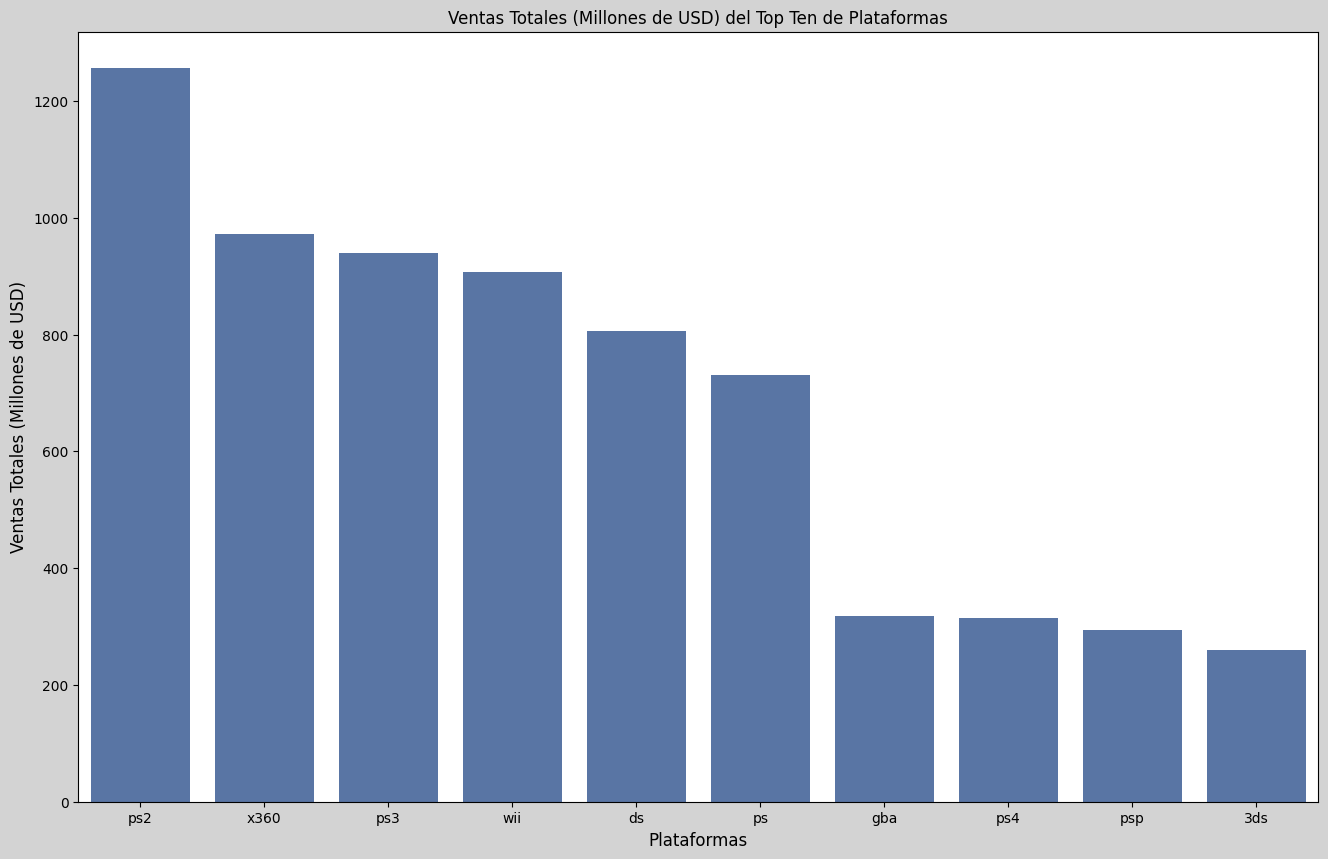

In [35]:
# Graficar las ventas de las 10 plataformas con mas ventas
sns.set_palette('deep')
plt.figure(figsize=(16,10), facecolor='lightgray')

sns.barplot(data=top_ten_platforms, x='platform', y='total_sales')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Plataformas', fontsize=12)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize=12)
plt.title('Ventas Totales (Millones de USD) del Top Ten de Plataformas', fontsize=12)

plt.show()

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [36]:
# Filtrar por las 6 consolas con mas ventas
platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
top = df_games.query('platform == @platforms')

# Agrupar por plataforma y su año de lanzamiento, sumando las ventas totales
top_platforms = top.groupby(['platform', 'year_of_release'])['total_sales'].sum()
top_platforms = top_platforms.reset_index()

top_platforms


,platform,year_of_release,total_sales
0,ds,1985,0.02
1,ds,2004,20.61
2,ds,2005,130.14
3,ds,2006,119.81
4,ds,2007,146.94
...,...,...,...
62,x360,2012,100.99
63,x360,2013,88.58
64,x360,2014,34.74
65,x360,2015,11.96


## Análisis de las Consolas con Mayor Ventas

De acuerdo a la gráfica anterior, se tomaron las seis consolas con mayores ventas debido a su destacada diferencia respecto a las demás. Se extrajeron las ventas totales por año para determinar la consola que más ha vendido a lo largo de su vida útil.

- **Nintendo DS**: Observamos ventas desde 1985 hasta 2013, lo cual podría ser un error en los datos ya que la DS fue lanzada en 2004. Es posible que este error se deba a la retrocompatibilidad con juegos de sus antecesoras. Se tomarán en cuenta las ventas a partir de 2004 hasta 2013, destacando su pico más alto en 2007, tres años después de su lanzamiento y seis años antes del fin de su vida útil.

- **PlayStation**: La línea de ventas comienza en 1994 hasta 2003. Destacó por ser una de las primeras consolas en utilizar discos en lugar de cartuchos, lo que permitió una mejor lectura al cargar los videojuegos debido a su mayor capacidad de almacenamiento. Su pico de ventas fue en 1998, cuatro años después de su lanzamiento y cinco años antes del término de su vida útil.

- **PlayStation 2 (PS2)**: Lanzada en 2000, tuvo su primer pico en 2002, tan solo dos años después de su lanzamiento. Gracias a la popularidad de su antecesora, la PlayStation, la PS2 tuvo mejores ventas y se convirtió en la consola más vendida hasta la fecha, evidenciado en su segundo pico en 2004. Terminó sus ventas en 2011 con una vida útil de 11 años.

- **Xbox 360**: Lanzada en 2005, tuvo ventas muy similares a su competidora, la PS3, lanzada un año después en 2006. Su pico de ventas fue en 2010, manteniéndose vigente hasta 2016, con 11 años de vida útil.

- **PlayStation 3 (PS3)**: Lanzada en 2006, estuvo vigente hasta 2016. Su pico de ventas fue en 2011, destacando su longevidad en el mercado de las consolas.

- **Wii**: Lanzada en 2006, se destacó por su innovador estilo de juego. Lideró las ventas gracias a esta novedad, con su pico máximo en 2009. Tuvo una vida útil de 2006 a 2016, con ventas casi tan altas como las del PS2 de Sony.

Se observa que la vida útil de las plataformas oscila entre 9 y 11 años, a pesar de que el intervalo entre consolas de la misma compañía tarda aproximadamente entre 6 y 7 años. Además, les toma aproximadamente de 4 a 5 años alcanzar su pico máximo de ventas, lo que puede deberse al interés cambiante de las compañías desarrolladoras de videojuegos en ciertas plataformas a lo largo del tiempo.


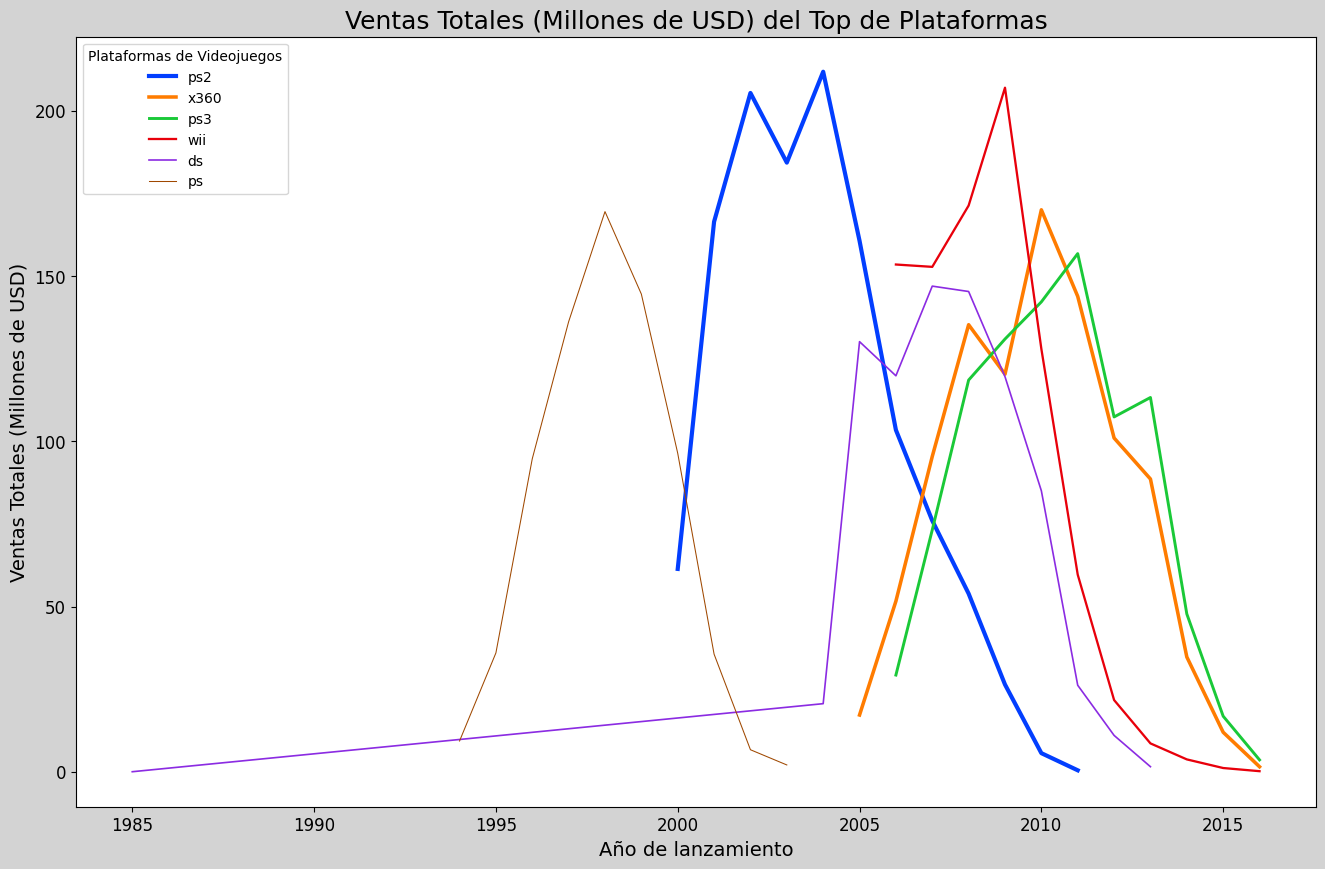

In [37]:
# Graficar las ventas del top 6 de plataformas
sns.set_palette('bright')
plt.figure(figsize=(16,10), facecolor='lightgray')

sns.lineplot(data=top_platforms,
             x='year_of_release',
             y='total_sales',
             hue='platform',
             hue_order=['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'],
             size='platform',
             size_order=['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Año de lanzamiento', fontsize=14)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize=14)
plt.title('Ventas Totales (Millones de USD) del Top de Plataformas', fontsize=18)
plt.legend(loc='upper left', title='Plataformas de Videojuegos')

plt.show()

  - Plataformas y Años:
    - Las plataformas incluyen PS2, X360, PS3, Wii, DS y PS.
    - Cada plataforma tiene un rango de años en los que estuvo activa.
  - Límite de Vida Útil:
    - La mayoría de las plataformas tuvieron una vida útil de alrededor de 10 años.
    - PS2, X360, PS3 y Wii se destacan por su longevidad.
  - Año de Mayor Éxito:
    - Cada plataforma alcanzó su punto máximo de ventas en un año específico.
    - Por ejemplo, PS2 tuvo su mayor éxito en 2004.
 
Este DataFrame proporciona una visión general de las plataformas de videojuegos y sus respectivas trayectorias. Las diferencias en la duración y el éxito de cada plataforma son interesantes para comprender la evolución de la industria. 🚀🎮


In [38]:
# Determinar el tiempo de vida util de las plataformas con mas venta
lifespan_ps2 = 'PS2', top_platforms.query('platform == "ps2"')['year_of_release'].min(), top_platforms.query('platform == "ps2"')['year_of_release'].max()
lifespan__x360 = 'X360', top_platforms.query('platform == "x360"')['year_of_release'].min(), top_platforms.query('platform == "x360"')['year_of_release'].max()
lifespan_ps3 = 'PS3', top_platforms.query('platform == "ps3"')['year_of_release'].min(), top_platforms.query('platform == "ps3"')['year_of_release'].max()
lifespan_wii = 'Wii', top_platforms.query('platform == "wii"')['year_of_release'].min(), top_platforms.query('platform == "wii"')['year_of_release'].max()
lifespan_ds = 'DS', 2004, top_platforms.query('platform == "ds"')['year_of_release'].max()
lifespan_ps = 'PS', top_platforms.query('platform == "ps"')['year_of_release'].min(), top_platforms.query('platform == "ps"')['year_of_release'].max()

lifespans = [lifespan_ps2, lifespan__x360, lifespan_ps3, lifespan_wii, lifespan_ds, lifespan_ps]
data = {
    'platform': [t[0] for t in lifespans],
    'first year': [t[1] for t in lifespans],
    'last year': [t[2] for t in lifespans]
}

df_lifespan = pd.DataFrame(data)
df_lifespan['lifespan'] = df_lifespan['last year'] - df_lifespan['first year']
df_lifespan['peak_sales'] = [2004, 2010, 2011, 2009, 2007, 1998]

df_lifespan.sort_values('lifespan', ascending=False)


,platform,first year,last year,lifespan,peak_sales
0,PS2,2000,2011,11,2004
1,X360,2005,2016,11,2010
2,PS3,2006,2016,10,2011
3,Wii,2006,2016,10,2009
4,DS,2004,2013,9,2007
5,PS,1994,2003,9,1998


Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

  - Filtrar los juegos lanzados específicamente en el año 2016.
  - Crear una lista única de las plataformas (consolas) en las que se lanzaron juegos durante ese año.
  - Mostrar las consolas de videojuegos correspondientes al año 2016. 
  
En resumen, este código nos permite identificar las consolas que estuvieron activas y tuvieron lanzamientos en el año 2016. 👾🕹️

In [39]:
# Filtrar los juegos lanzados en 2016
platforms_2016 = df_games.query('year_of_release == 2016')['platform']
platforms_2016 = platforms_2016.unique().tolist()
platforms_2016

['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'pc', 'x360', 'psv', 'wii']

In [40]:
# Filtrar los juegos lanzados en 2016 para las plataformas seleccionadas
df_platforms_2016 = df_games.query('platform == @platforms_2016')
grp_platforms = df_platforms_2016.groupby(by=['platform', 'year_of_release'])['total_sales'].sum()

df_new_platforms = pd.DataFrame(grp_platforms).reset_index()
df_new_platforms


,platform,year_of_release,total_sales
0,3ds,2011,64.39
1,3ds,2012,51.36
2,3ds,2013,56.57
3,3ds,2014,43.76
4,3ds,2015,27.78
...,...,...,...
80,x360,2016,1.52
81,xone,2013,18.96
82,xone,2014,54.07
83,xone,2015,60.14


**La gráfica proporcionada visualiza las ventas totales de videojuegos por plataforma durante el año 2016.**

  - La gráfica es un gráfico de líneas que muestra la evolución de las ventas totales de diferentes plataformas a lo largo del tiempo.
  - Cada línea representa una plataforma específica, y los marcadores indican los puntos de datos clave.
  - Las plataformas incluidas son DS, PS3, PS4, Wii, Wii U y Xbox 360.
  - **DS:** Aunque tuvo un comienzo fuerte, sus ventas disminuyeron gradualmente después de 2007.
  - **PS3:** Experimentó un crecimiento constante hasta 2011, luego declinó.
  - **PS4:** Tuvo un aumento significativo en ventas a partir de 2013.
  - **Wii:** Alcanzó su punto máximo en 2009 y luego disminuyó rápidamente.
  - **Wii U:** Aunque tuvo un comienzo prometedor, sus ventas no se mantuvieron.
  - **Xbox 360:** Alcanzó su punto máximo en 2010 y luego disminuyó. 

*En resumen, esta gráfica nos muestra las tendencias de ventas en diferentes plataformas de videojuegos en 2016.

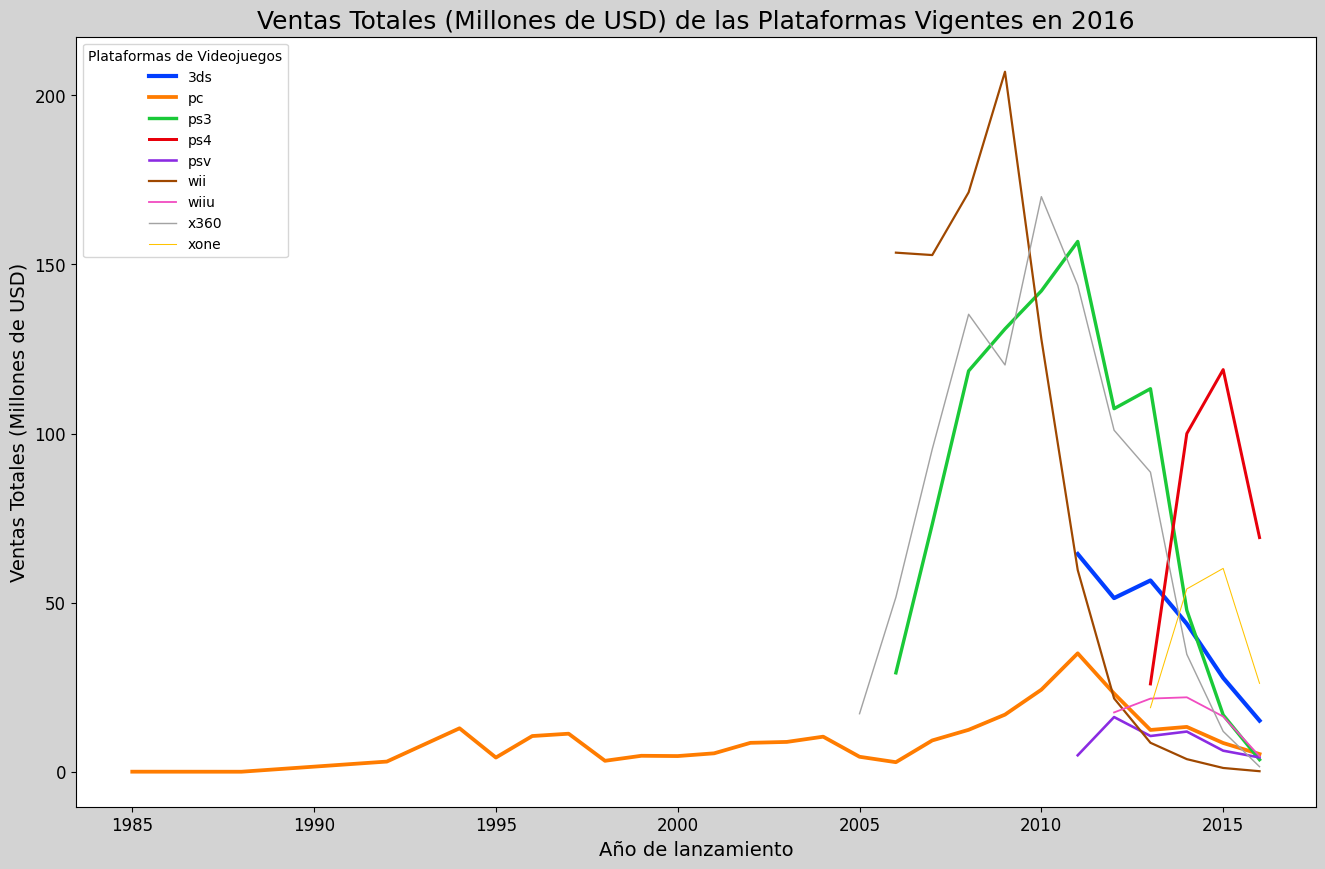

In [41]:
# Graficar las ventas totales del 2016 por plataformas
sns.set_palette('bright')
plt.figure(figsize=(16,10), facecolor='lightgray')

sns.lineplot(data=df_new_platforms,
             x='year_of_release',
             y='total_sales',
             hue='platform',             
             size='platform',
             markers=True
             )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Año de lanzamiento', fontsize=14)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize=14)
plt.title('Ventas Totales (Millones de USD) de las Plataformas Vigentes en 2016', fontsize=18)
plt.legend(loc='upper left', title='Plataformas de Videojuegos')

plt.show()

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

🎮 Este análisis nos permite visualizar las tendencias de ventas en las distintas plataformas de videojuegos en 2013.

In [42]:
# Filtrar los juegos lanzados a partir de 2013
df_games_2013 = df_games.query('year_of_release >= 2013')
df_platforms_2013 = df_games_2013.groupby(['platform', 'year_of_release'])['total_sales'].sum()
df_platforms_2013 = df_platforms_2013.reset_index()
df_platforms_2013

,platform,year_of_release,total_sales
0,3ds,2013,56.57
1,3ds,2014,43.76
2,3ds,2015,27.78
3,3ds,2016,15.14
4,ds,2013,1.54
5,pc,2013,12.38
6,pc,2014,13.28
7,pc,2015,8.52
8,pc,2016,5.25
9,ps3,2013,113.25


*La gráfica muestra las ventas totales de videojuegos en millones de dólares (USD) para diferentes plataformas durante el período de 2013 a 2016. Las plataformas incluidas son PS4, PS3, PSP, PSVita, Xbox 360, Xbox One, Wii U y 3DS. Cada línea de color representa una plataforma específica.*

# Interpretación 
 
  - **Tendencias de Ventas:** Se observan variaciones en las ventas a lo largo de los años para cada plataforma.
  - **Éxito Relativo:** Algunas plataformas, como PS4 y Xbox One, experimentaron un crecimiento significativo en ventas, mientras que otras, como PSP y Wii U, tuvieron ventas más modestas.
   - **Cambios en el Mercado:** La gráfica refleja la dinámica cambiante del mercado de videojuegos durante este período.
En resumen, esta visualización nos permite comparar las ventas entre plataformas y entender las preferencias de los jugadores en ese lapso de tiempo.

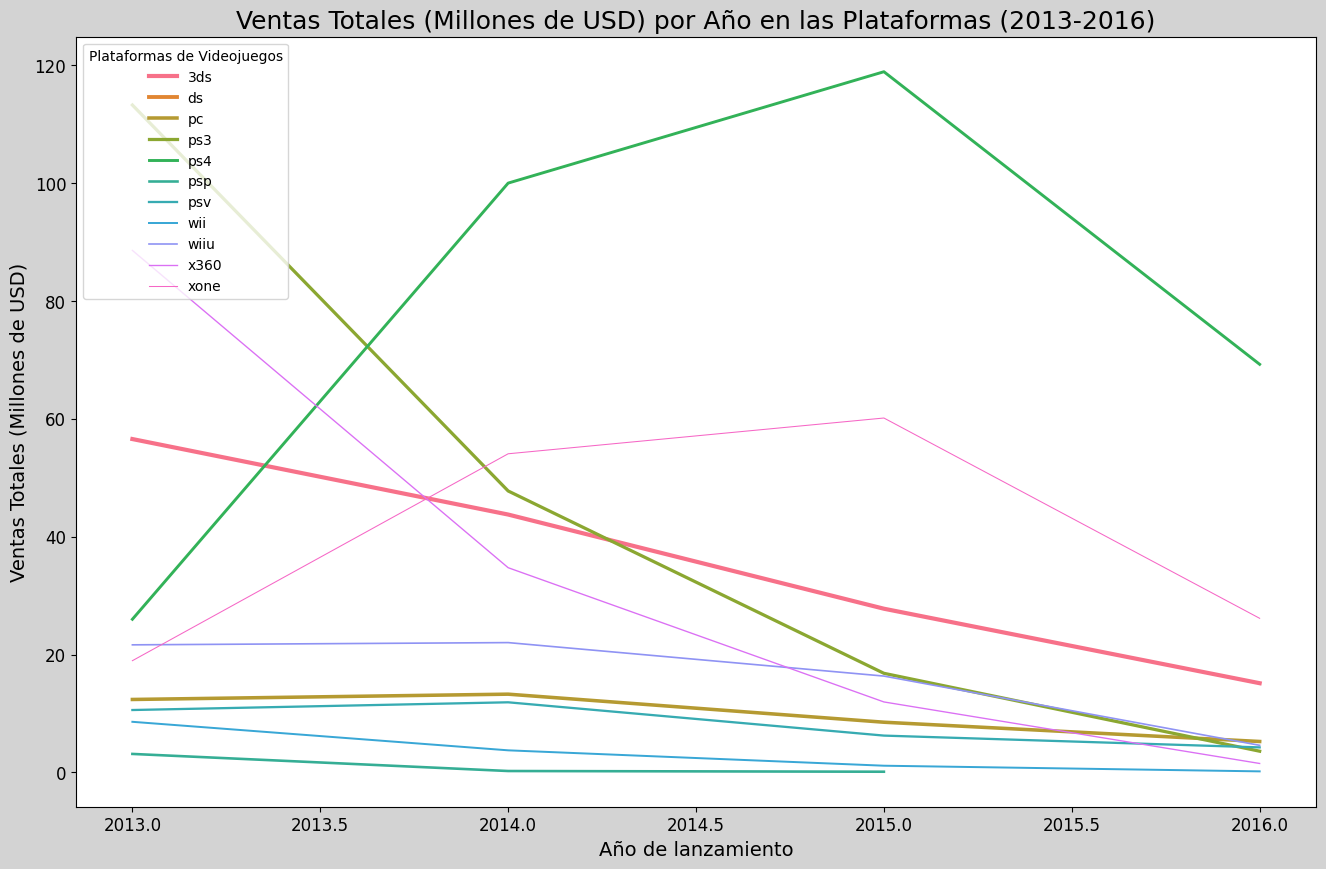

In [43]:
# Graficar las ventas de la plataformas del 2013 al 2016
sns.set_palette('bright')
plt.figure(figsize=(16,10), facecolor='lightgray')

sns.lineplot(data=df_platforms_2013,
             x='year_of_release',
             y='total_sales',
             hue='platform',             
             size='platform',
             )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Año de lanzamiento', fontsize=14)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize=14)
plt.title('Ventas Totales (Millones de USD) por Año en las Plataformas (2013-2016)', fontsize=18)
plt.legend(loc='upper left', title='Plataformas de Videojuegos')

plt.show()

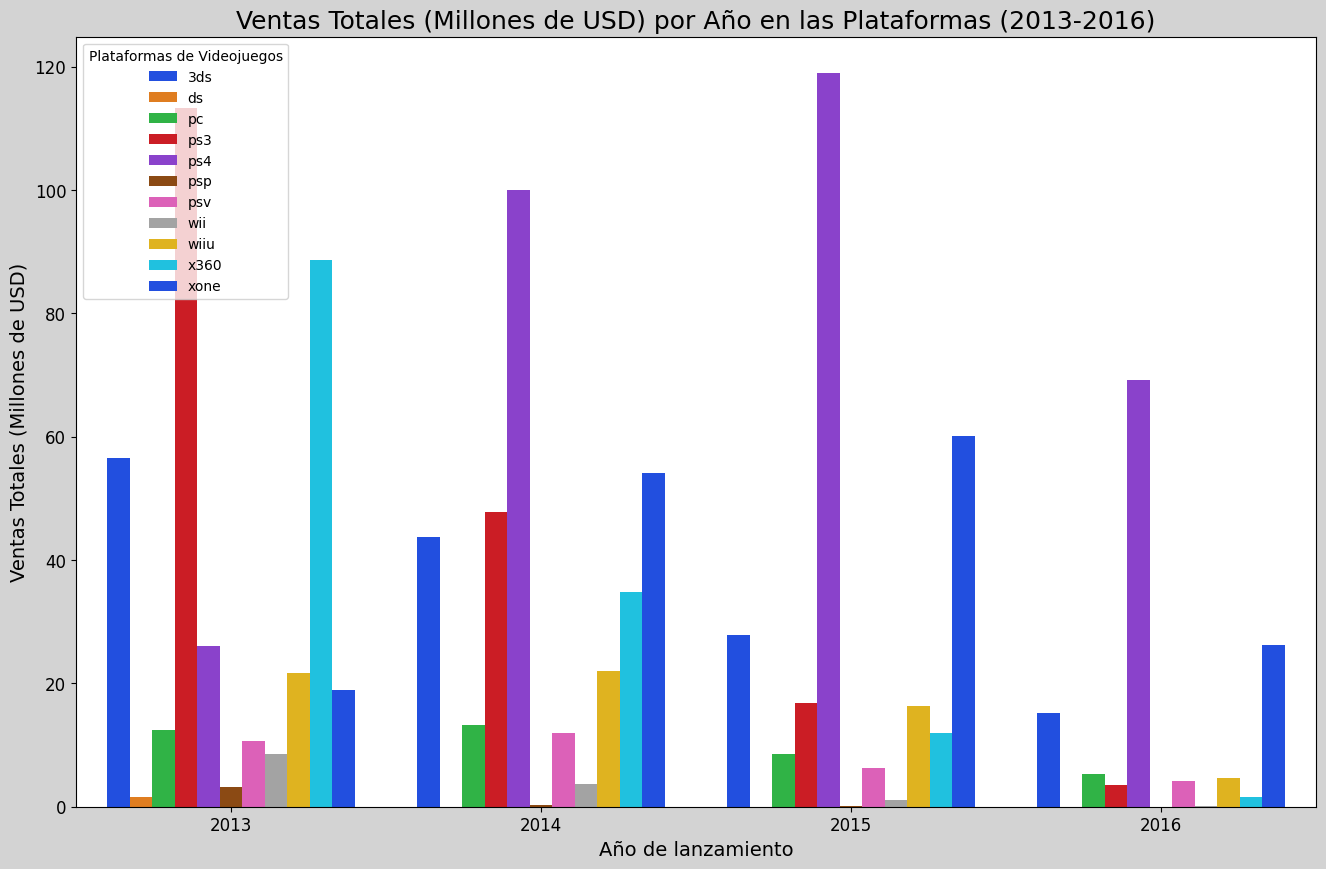

In [44]:
# Graficar las ventas totales por Año en cada platafomra del 20113 al 2016
sns.set_palette('bright')
plt.figure(figsize=(16,10), facecolor='lightgray')

sns.barplot(data=df_platforms_2013,
             x='year_of_release',
             y='total_sales',
             hue='platform',
             palette='bright',             
            )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Año de lanzamiento', fontsize=14)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize=14)
plt.title('Ventas Totales (Millones de USD) por Año en las Plataformas (2013-2016)', fontsize=18)
plt.legend(loc='upper left', title='Plataformas de Videojuegos')

plt.show()

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [45]:
# Agrupar las ventas totales por plataforma y utilizar el metodo describe()
sales_by_paltform = df_games.groupby('platform')['total_sales'].describe()

sales_by_paltform

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
3do,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3ds,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
dc,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
ds,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
gb,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
gba,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
gc,556.0,0.357788,0.686346,0.01,0.0600,0.150,0.3525,7.06
gen,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


*La gráfica muestra las ventas totales de videojuegos en millones de dólares (USD) para diferentes plataformas durante el período de 2013 a 2016. Las plataformas incluidas son PS4, PS3, PSP, PSVita, Xbox 360, Xbox One, Wii U y 3DS. Cada línea de color representa una plataforma específica.*

# Interpretación 
 
  - **Tendencias de Ventas:** Se observan variaciones en las ventas a lo largo de los años para cada plataforma.
  - **Éxito Relativo:** Algunas plataformas, como PS4 y Xbox One, experimentaron un crecimiento significativo en ventas, mientras que otras, como PSP y Wii U, tuvieron ventas más modestas.
  - **Cambios en el Mercado:** La gráfica refleja la dinámica cambiante del mercado de videojuegos durante este período.
En resumen, esta visualización nos permite comparar las ventas entre plataformas y entender las preferencias de los jugadores en ese lapso de tiempo.

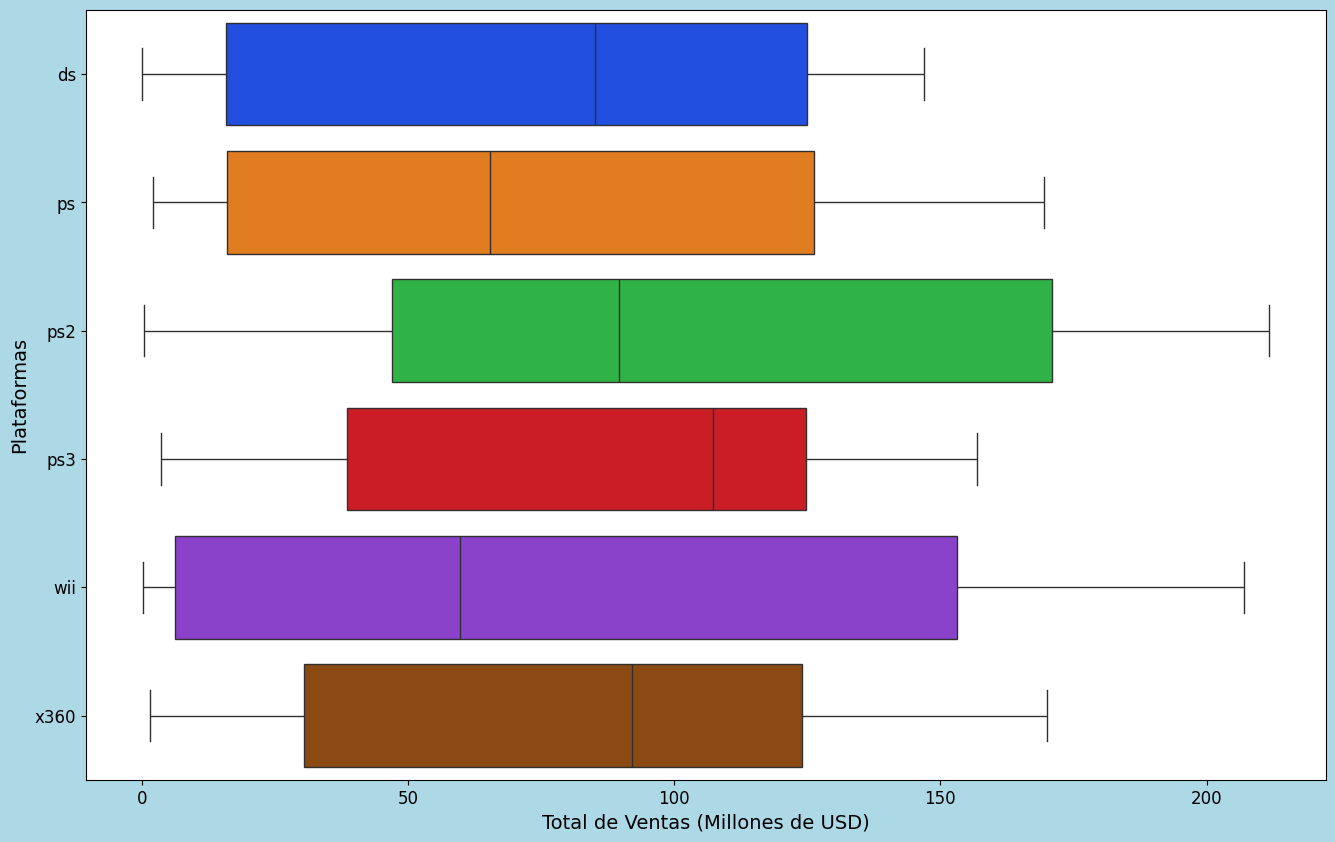

In [46]:
# Grafico de caja del total de ventas por las plataformas con mayores ventas
plt.figure(figsize=(16, 10), facecolor='lightblue')

sns.boxplot(data=top_platforms,
            x='total_sales',
            y='platform',
            orient='h',
            palette='bright')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Total de Ventas (Millones de USD)', fontsize=14)
plt.ylabel('Plataformas', fontsize=14)
#plt.xlim(right=35)

plt.show()



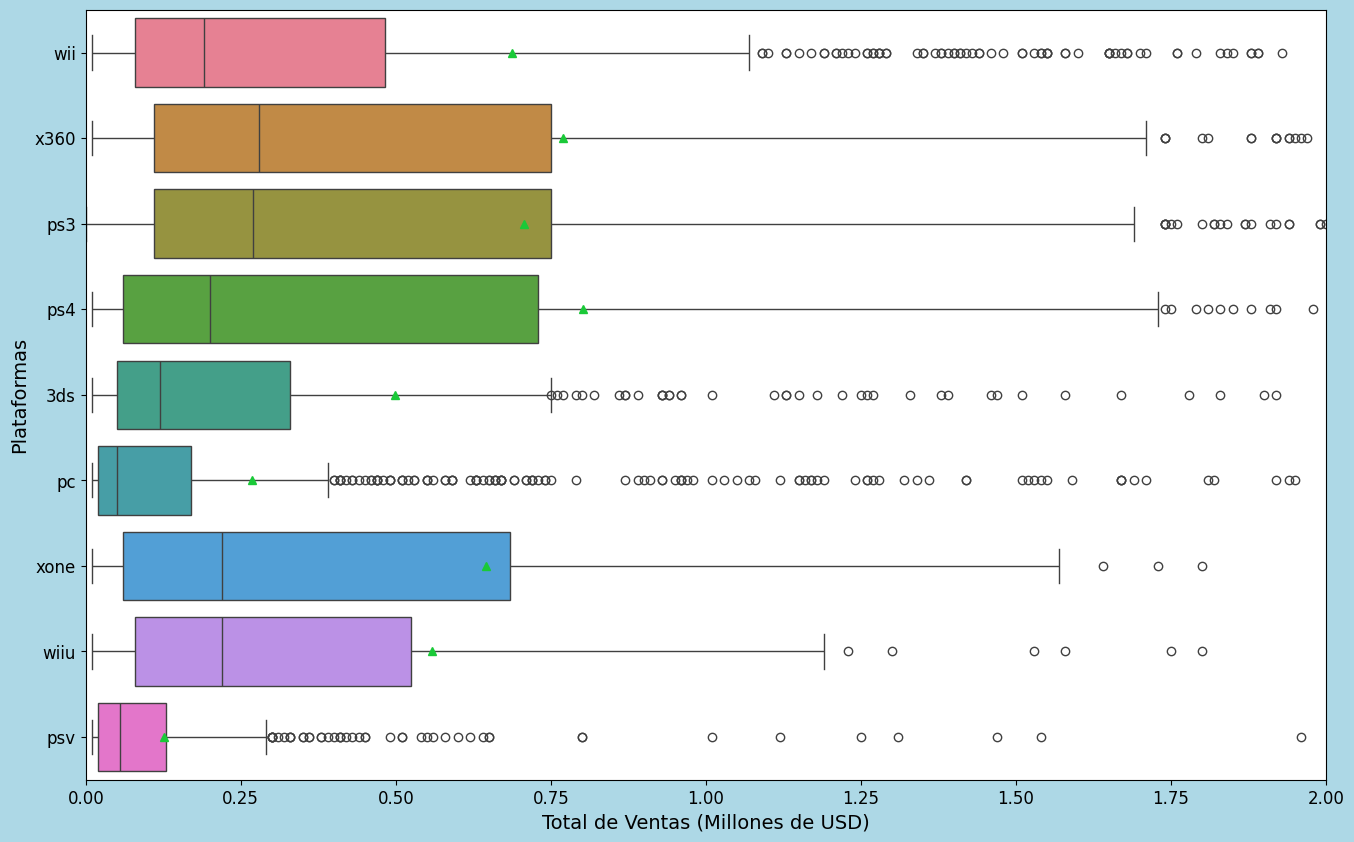

In [47]:
# Grafico de caja de la ventas totaes de las plataformas con mas ventas en 2016
plt.figure(figsize=(16, 10), facecolor='lightblue')

sns.boxplot(data=df_platforms_2016,
            x='total_sales',
            y='platform',
            showmeans=True,
            orient='h',            
            palette='husl')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Total de Ventas (Millones de USD)', fontsize=14)
plt.ylabel('Plataformas', fontsize=14)
plt.xlim(0,2)

plt.show()

In [48]:
# Filtrar por las plataformas que en 2017 tienen vida util
platforms_2017 = ['ps4', 'xone', '3ds', 'wiiu', 'pc']
df_platforms_2017 = df_games.query('platform == @platforms_2017')

df_platforms_2017

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,esrb_rating
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,rp
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,rp
40,mario kart 7,3ds,2011,racing,5.03,4.02,2.69,0.91,12.65,8.5,8.2,e
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,12.62,9.7,8.3,m
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,rp
...,...,...,...,...,...,...,...,...,...,...,...,...
16667,pony friends 2,pc,2009,simulation,0.00,0.01,0.00,0.00,0.01,NaN,NaN,rp
16669,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,0.01,8.0,7.6,m
16673,breach,pc,2011,shooter,0.01,0.00,0.00,0.00,0.01,6.1,5.8,t
16679,storm: frontline nation,pc,2011,strategy,0.00,0.01,0.00,0.00,0.01,6.0,7.2,e10+


*El gráfico de cajas compara las ventas totales en millones de dólares (USD) para diferentes consolas de videojuegos: PS4, Xbox One, Nintendo 3DS y Wii U. Cada consola tiene su propio conjunto de datos representado por una caja y bigotes que indican la mediana y los cuartiles*

Interpretación 
 
# **Consolas con Mejor Desempeño:**

  - La consola con la `mejor mediana` de ventas es `PS4`, ya que su línea central está posicionada hacia el extremo superior de su rango.
  - El rango `intercuartil (IQR)` de `PS4` parece relativamente grande, lo que indica cierta variabilidad en los datos de ventas.
  - La `mediana` de `Xbox One` es ligeramente más baja que la de `PS4`, con menos valores atípicos.
  - `Nintendo 3DS` muestra una `mediana más baja` en comparación con `PS4` y `Xbox One`, pero con muchos valores atípicos, lo que sugiere alta variabilidad en los datos de ventas.
  - `Wii U` tiene la `mediana más baja` de todas, con pocos valores atípicos. 

*En resumen, visualmente, PS4 parece tener una mayor tendencia central en términos de ventas totales, pero también exhibe una considerable variabilidad en su rango y valores atípicos.*

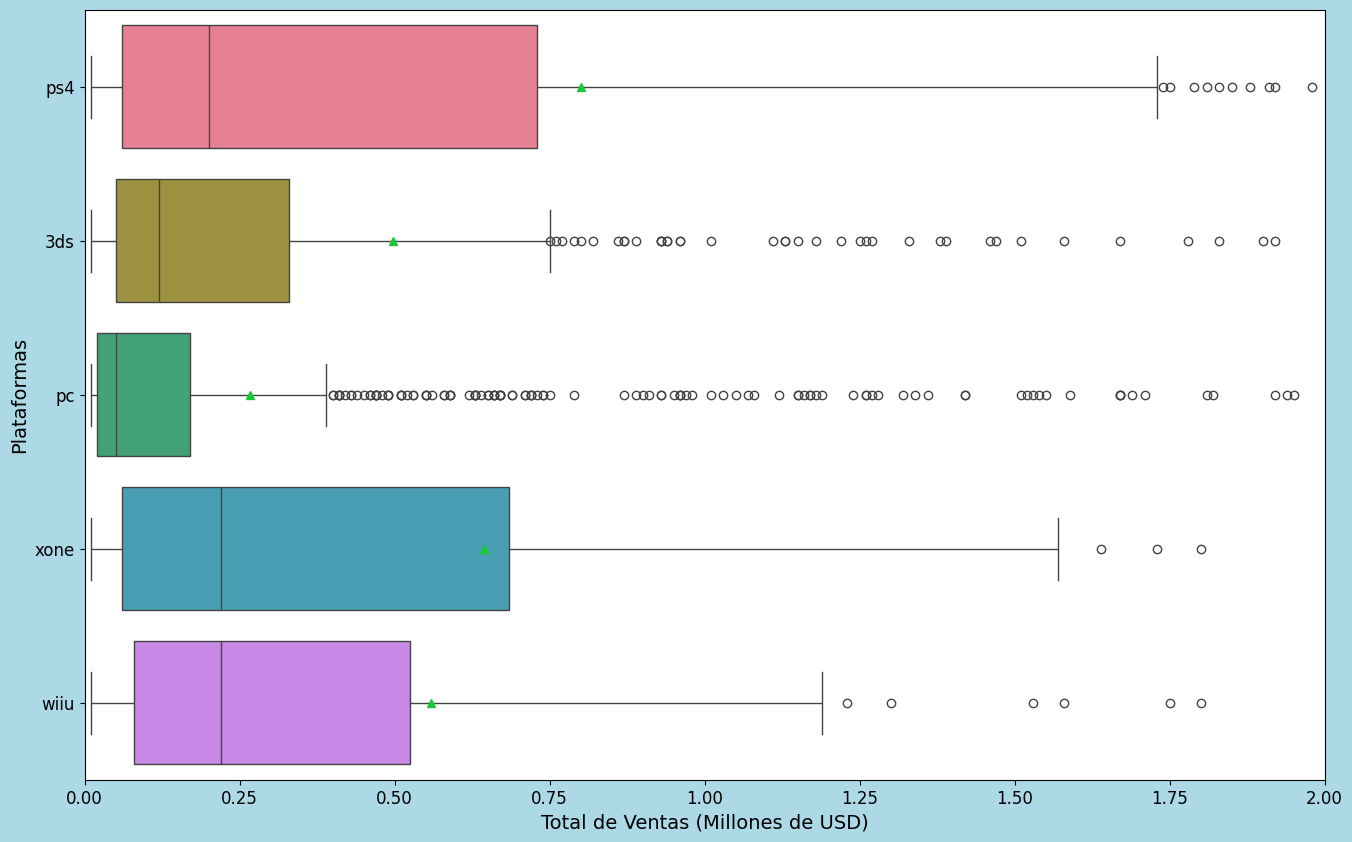

In [49]:
# Grafico de caja de las plataformas que tienen vida util en 2017
plt.figure(figsize=(16, 10), facecolor='lightblue')

sns.boxplot(data=df_platforms_2017,
            x='total_sales',
            y='platform',
            showmeans=True,
            orient='h',            
            palette='husl')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Total de Ventas (Millones de USD)', fontsize=14)
plt.ylabel('Plataformas', fontsize=14)
plt.xlim(0,2)

plt.show()

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [50]:
# Funcion pra crear graficos de dispersion de las reseñas de Criticos y Usuarios con el nombre de la plataforma
def scatter_plot(platform_name: str):
    """
    Crear 2 graficos de dispersion para la plataforma de la eleccion:
        Primer grafico es entre las ventas totales y las reseñas de los criticos
        Segundo grafico es entrelas ventas totales y las reseñas de los usuarios
    Calcula la correlacion entre las reseñas y la ventas para ambos casos    
    """

# Filtrar por el nombre de la plataforma
    df_single_platform = df_games.query('platform == @platform_name')

# Crear los 2 graficos de dispersion
    figure, axes = plt.subplots(1 ,2, figsize=(20,10))

    ax1 = sns.regplot(data=df_single_platform,
                      x='critic_score',
                      y='total_sales',
                      ax=axes[0],
                      scatter_kws = {'color': '#14213D', 'alpha': 0.7},
                      line_kws={'color': '#9E2A2B'})

    ax1.set(xlabel='Reseñas de Criticos (0 a 10)',
            ylabel='Ventas Totales (Millones de USD)',
            title=f'Correlacion entre las Reseñas de los Criticos y las Ventas de la plataforma {platform_name}',
            ylim=(-1/2,6))

    ax2 = sns.regplot(data=df_single_platform,
                      x='user_score',
                      y='total_sales',
                      ax=axes[1],
                      scatter_kws = {'color': '#FCA311', 'alpha': 0.7},
                      line_kws={'color': '#9E2A2B'})

    ax2.set(xlabel='Reseñas de Usuarios (0 a 10)',
            ylabel='Ventas Totales (Millones de USD)',
            title=f'Correlacion entre las Reseñas de los Usuarios y la Ventas de la plataforma {platform_name}',
            ylim=(1/2,6))

    plt.show()

    print(f'Correlacion entre las calificaciones de los criticos y la ventas totales de la plataforma {platform_name}:', df_single_platform['total_sales'].corr(df_single_platform['critic_score']))
    print(f'Correlacion entre las calificaciones de los usuarios y la ventas totales de la plataforma {platform_name}:', df_single_platform['total_sales'].corr(df_single_platform['user_score']))


# Reseñas de Críticos vs. Ventas Totales
  - El gráfico izquierdo muestra la relación entre las calificaciones de los críticos y las ventas totales de la plataforma PS4.
  - La correlación positiva (coeficiente de correlación ≈ 0.41) sugiere que, en general, cuando las reseñas de los críticos son más favorables, las ventas tienden a ser mayores. 

# Reseñas de Usuarios vs. Ventas Totales
  - El gráfico derecho ilustra la correlación entre las calificaciones de los usuarios y las ventas totales de la plataforma PS4.
  -La correlación es casi nula (coeficiente de correlación ≈ -0.03), lo que indica que las opiniones de los usuarios no están fuertemente relacionadas con las ventas. 

*En resumen, las reseñas de los críticos parecen influir más en las ventas de PS4 que las opiniones de los usuarios.*

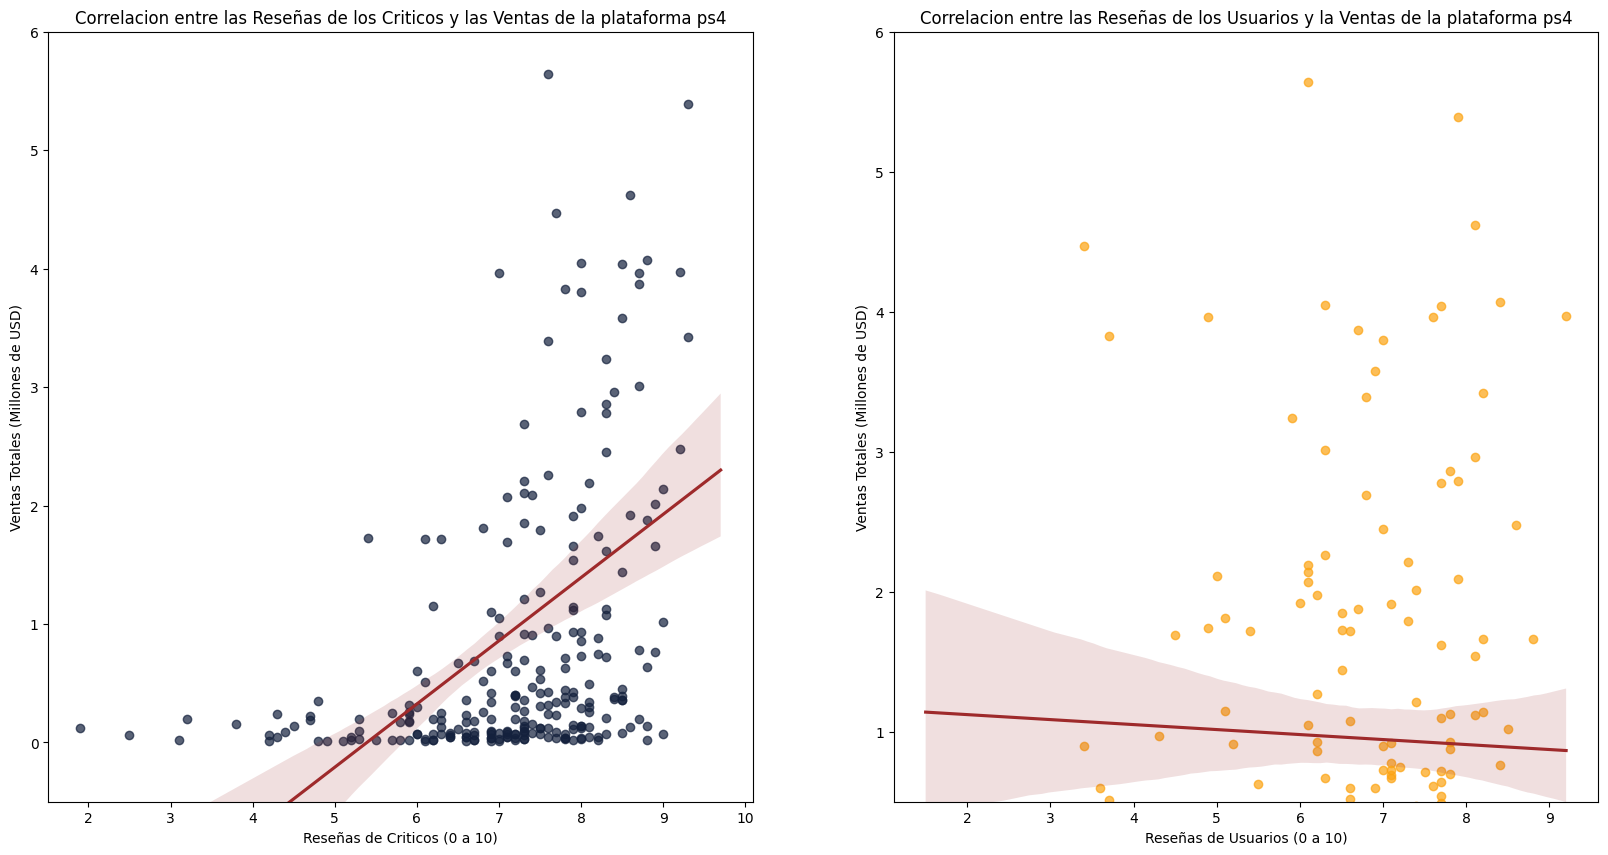

Correlacion entre las calificaciones de los criticos y la ventas totales de la plataforma ps4: 0.4065679020617815
Correlacion entre las calificaciones de los usuarios y la ventas totales de la plataforma ps4: -0.03195711020455643


In [51]:
# Graficar criticas de PS4
scatter_plot('ps4')

# Reseñas de Críticos vs. Ventas Totales 
 
  - El gráfico izquierdo muestra la relación entre las calificaciones de los críticos y las ventas totales de la plataforma Xbox One.
  - La correlación positiva (coeficiente de correlación ≈ 0.42) sugiere que, en general, cuando las reseñas de los críticos son más favorables, las ventas tienden a ser mayores. 

# Reseñas de Usuarios vs. Ventas Totales 
 
  - El gráfico derecho ilustra la correlación entre las calificaciones de los usuarios y las ventas totales de la plataforma Xbox One.
  - La correlación es casi nula (coeficiente de correlación ≈ -0.07), lo que indica que las opiniones de los usuarios no están fuertemente relacionadas con las ventas. 

*En resumen, las reseñas de los críticos parecen influir más en las ventas de Xbox One que las opiniones de los usuarios.*

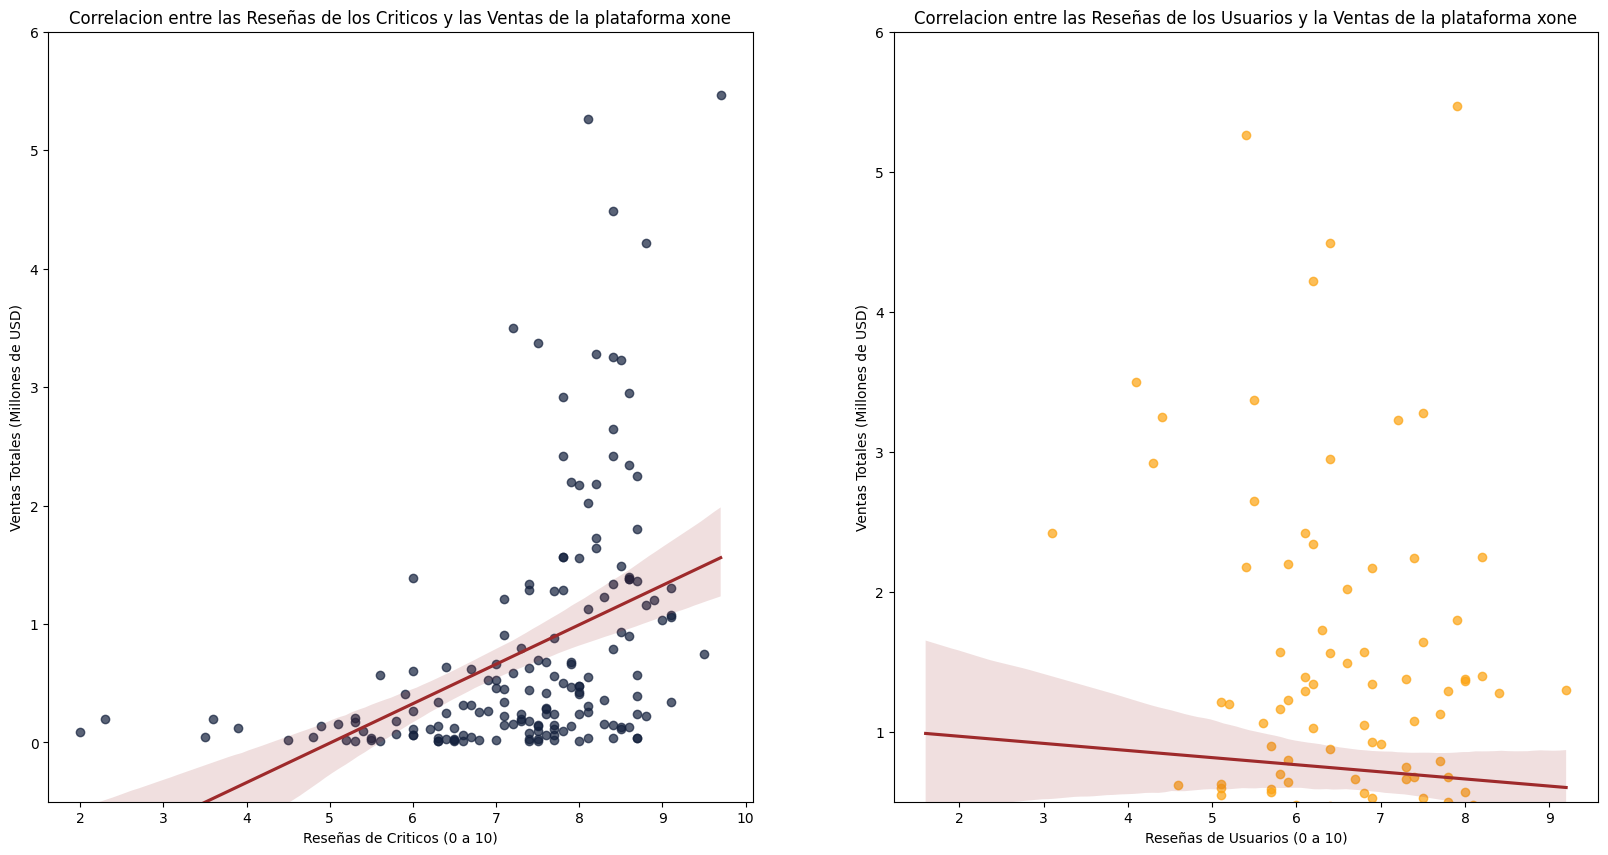

Correlacion entre las calificaciones de los criticos y la ventas totales de la plataforma xone: 0.41699832800840164
Correlacion entre las calificaciones de los usuarios y la ventas totales de la plataforma xone: -0.06892505328279415


In [52]:
# Graficar criticas de XboxOne
scatter_plot('xone')

# Reseñas de Críticos vs. Ventas Totales 
 
  - El gráfico izquierdo muestra la relación entre las calificaciones de los críticos y las ventas totales de la plataforma Nintendo 3DS.
  - La correlación positiva (coeficiente de correlación ≈ 0.35) sugiere que, en general, cuando las reseñas de los críticos son más favorables, las ventas tienden a ser mayores. 

# Reseñas de Usuarios vs. Ventas Totales 
 
  - El gráfico derecho ilustra la correlación entre las calificaciones de los usuarios y las ventas totales de la plataforma Nintendo 3DS.
  - La correlación también es positiva (coeficiente de correlación ≈ 0.22), aunque menos fuerte que la de las reseñas de críticos. 

*En resumen, tanto las opiniones de los críticos como las de los usuarios parecen influir en las ventas de Nintendo 3DS, pero las reseñas de críticos tienen una correlación ligeramente más fuerte con las ventas.*

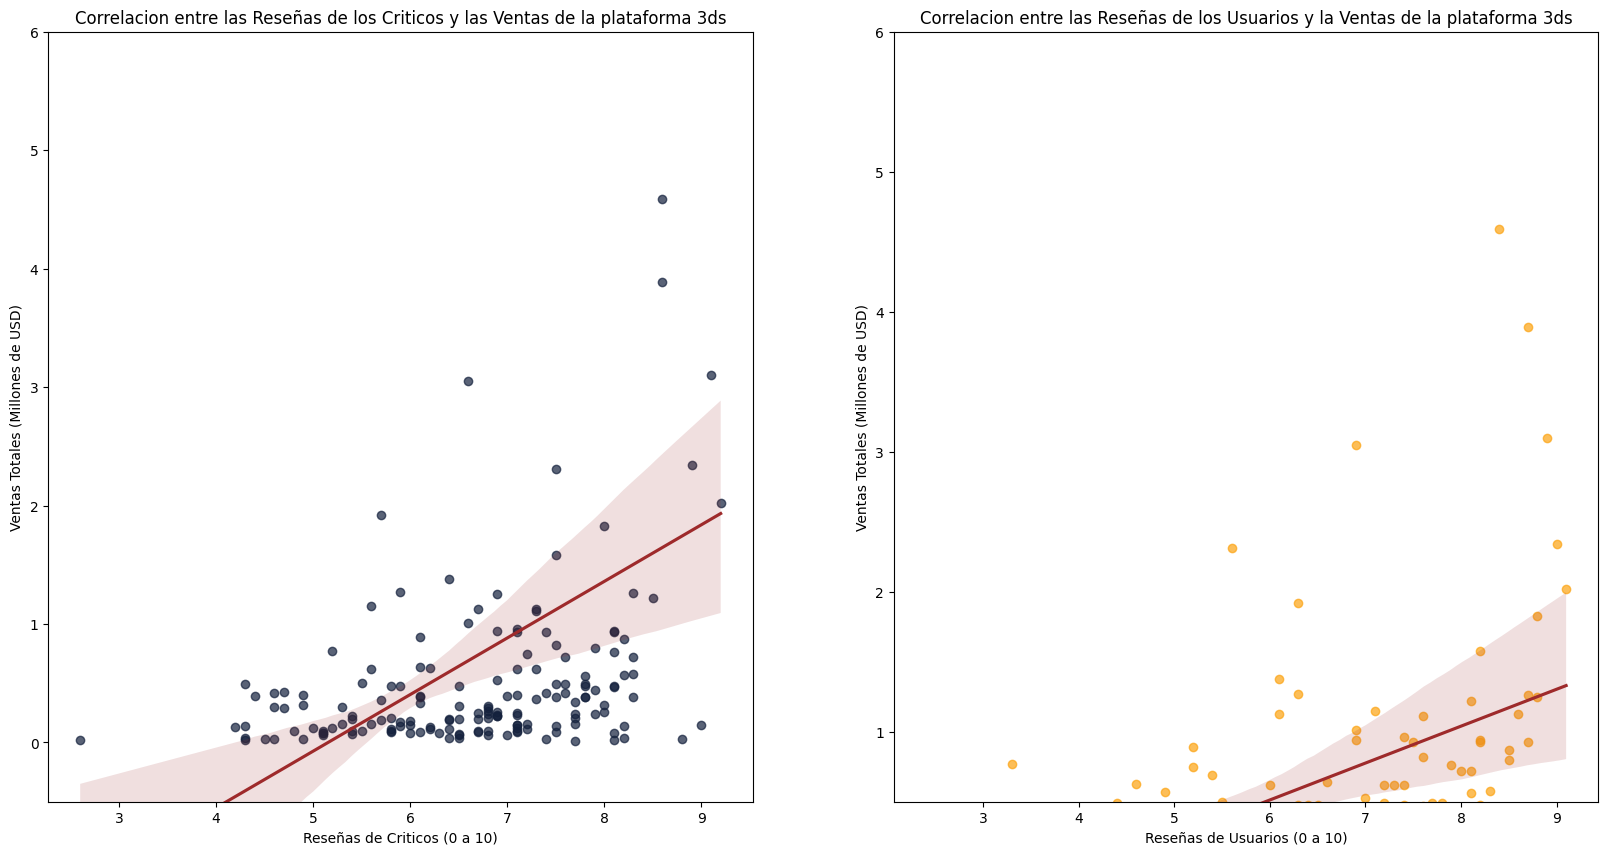

Correlacion entre las calificaciones de los criticos y la ventas totales de la plataforma 3ds: 0.3494009303924132
Correlacion entre las calificaciones de los usuarios y la ventas totales de la plataforma 3ds: 0.22480798039571087


In [53]:
# Graficar criticas de 3DS
scatter_plot('3ds')

# Reseñas de Críticos vs. Ventas Totales 
 
  - El gráfico izquierdo muestra la relación entre las calificaciones de los críticos y las ventas totales de la plataforma Wii U.
  - La correlación positiva (coeficiente de correlación ≈ 0.35) sugiere que, en general, cuando las reseñas de los críticos son más favorables, las ventas tienden a ser mayores. 

# Reseñas de Usuarios vs. Ventas Totales 
 
  - El gráfico derecho ilustra la correlación entre las calificaciones de los usuarios y las ventas totales de la plataforma Wii U.
  - La correlación también es positiva (coeficiente de correlación ≈ 0.40), aunque menos fuerte que la de las reseñas de críticos. 

*En resumen, tanto las opiniones de los críticos como las de los usuarios parecen influir en las ventas de la Wii U, pero las reseñas de críticos tienen una correlación ligeramente más fuerte con las ventas.*

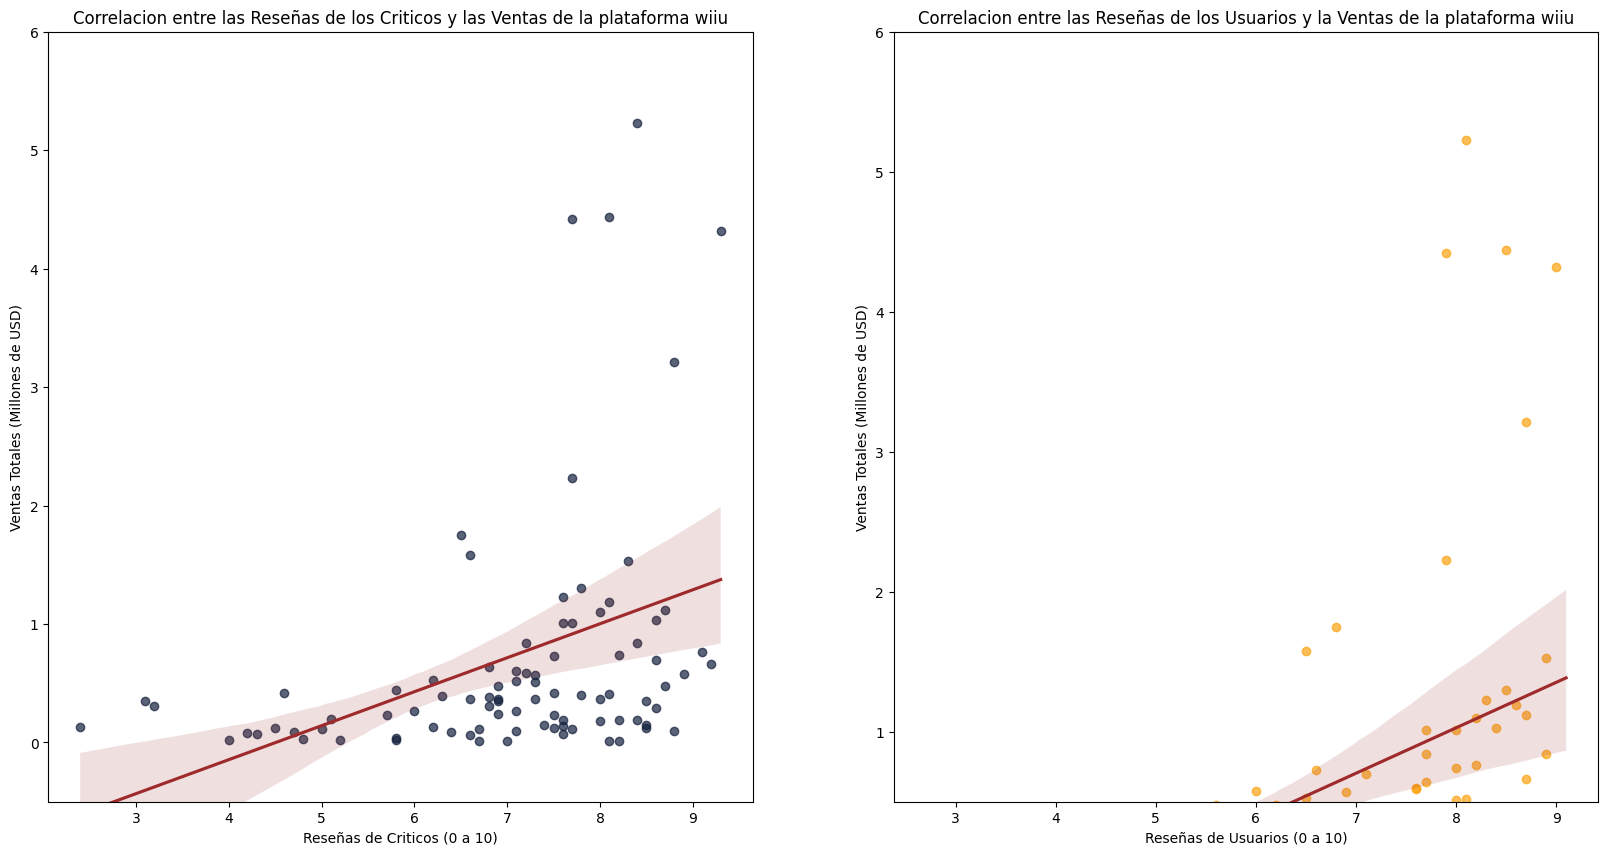

Correlacion entre las calificaciones de los criticos y la ventas totales de la plataforma wiiu: 0.3483797601201745
Correlacion entre las calificaciones de los usuarios y la ventas totales de la plataforma wiiu: 0.4002190202148617


In [54]:
# Graficar criticas de WiiU
scatter_plot('wiiu')

# Reseñas de Críticos vs. Ventas Totales 
 
  - El gráfico izquierdo muestra la relación entre las calificaciones de los críticos y las ventas totales de la plataforma PC.
  - La correlación positiva (coeficiente de correlación ≈ 0.26) sugiere que, en general, cuando las reseñas de los críticos son más favorables, las ventas tienden a ser mayores. 
 
# Reseñas de Usuarios vs. Ventas Totales 
 
  - El gráfico derecho ilustra la correlación entre las calificaciones de los usuarios y las ventas totales de la plataforma PC.
  - La correlación es muy baja (coeficiente de correlación ≈ 0.01), lo que indica que las opiniones de los usuarios no están fuertemente relacionadas con las ventas. 

*En resumen, las reseñas de los críticos parecen influir más en las ventas de la PC que las opiniones de los usuarios*

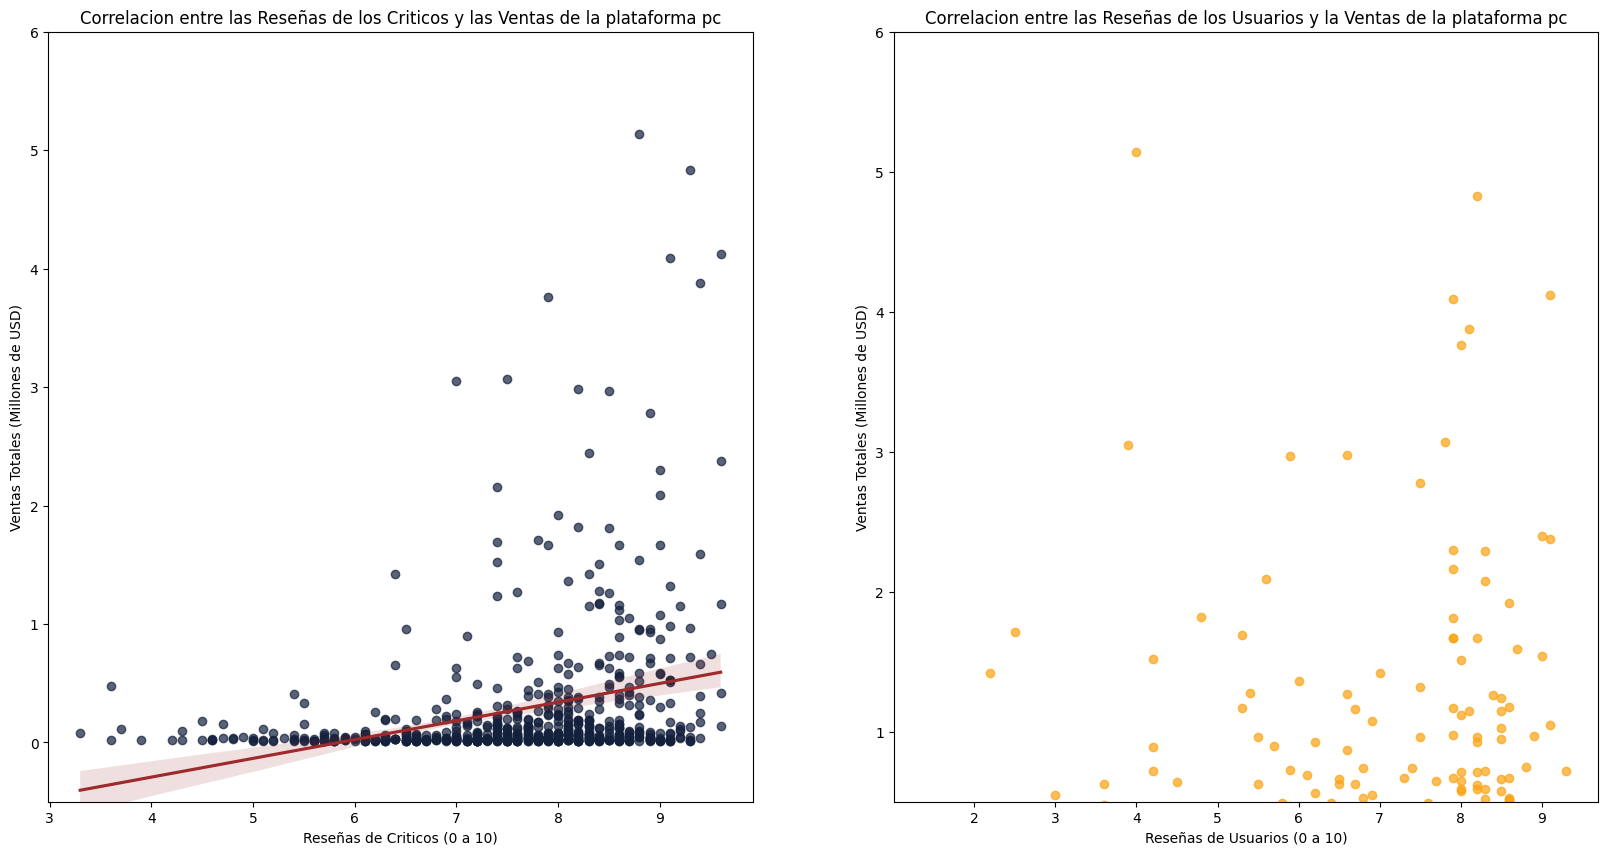

Correlacion entre las calificaciones de los criticos y la ventas totales de la plataforma pc: 0.2577734726361239
Correlacion entre las calificaciones de los usuarios y la ventas totales de la plataforma pc: 0.013411424294918204


In [55]:
# Graficar criticas de PC
scatter_plot('pc')

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

🔍 Se agruparan los juegos por plataformas para determinar que juegos fueron lanzados en varias de ellas y analizar las ventas de los juegos multiplataformas.

In [56]:
# Agrupar juegos por plataforma
top_games = df_games.groupby(['platform', 'name'])['total_sales'].sum()
top_games = top_games.sort_values(ascending=False)
top_games.head(20)

platform  name                                        
wii       wii sports                                      82.54
nes       super mario bros.                               40.24
wii       mario kart wii                                  35.52
          wii sports resort                               32.77
gb        pokemon red/pokemon blue                        31.38
          tetris                                          30.26
ds        new super mario bros.                           29.80
wii       wii play                                        28.91
          new super mario bros. wii                       28.32
nes       duck hunt                                       28.31
ds        nintendogs                                      24.67
          mario kart ds                                   23.21
gb        pokemon gold/pokemon silver                     23.09
wii       wii fit                                         22.70
x360      kinect adventures!                     

In [57]:
# Filtrar juegos por sus ventas totales en PS4
top_games_ps4 = df_games.query('platform == "ps4"').groupby('name')['total_sales'].sum()
top_games_ps4 = top_games_ps4.sort_values(ascending=False)
top_games_ps4 = top_games_ps4.reset_index()
top_games_ps4 = top_games_ps4.head(10)
top_games_ps4


,name,total_sales
0,call of duty: black ops 3,14.63
1,grand theft auto v,12.62
2,fifa 16,8.58
3,star wars battlefront (2015),7.98
4,call of duty: advanced warfare,7.66
5,fifa 17,7.60
6,fallout 4,7.17
7,fifa 15,6.08
8,destiny,5.64
9,uncharted 4: a thief's end,5.39


In [58]:
# Filtrar juegos por sus ventas totales en XboxOne
top_games_xone = df_games.query('platform == "xone"').groupby('name')['total_sales'].sum()
top_games_xone = top_games_xone.sort_values(ascending=False)
top_games_xone = top_games_xone.reset_index()
top_games_xone = top_games_xone.head(10)
top_games_xone

,name,total_sales
0,call of duty: black ops 3,7.39
1,grand theft auto v,5.47
2,call of duty: advanced warfare,5.26
3,halo 5: guardians,4.49
4,fallout 4,4.22
5,star wars battlefront (2015),3.66
6,assassin's creed: unity,3.50
7,destiny,3.37
8,gears of war: ultimate edition,3.28
9,fifa 16,3.25


In [59]:
# Filtrar juegos por sus ventas totales en PS3
top_games_ps3 = df_games.query('platform == "ps3"').groupby('name')['total_sales'].sum()
top_games_ps3 = top_games_ps3.sort_values(ascending=False)
top_games_ps3 = top_games_ps3.reset_index()
top_games_ps3 = top_games_ps3.head(10)
top_games_ps3

,name,total_sales
0,grand theft auto v,21.05
1,call of duty: black ops ii,13.79
2,call of duty: modern warfare 3,13.33
3,call of duty: black ops,12.63
4,gran turismo 5,10.70
5,call of duty: modern warfare 2,10.61
6,grand theft auto iv,10.50
7,call of duty: ghosts,9.36
8,fifa soccer 13,8.17
9,battlefield 3,7.17


In [60]:
# Filtrar juegos por sus ventas totales en Xbox360
top_games_x360 = df_games.query('platform == "x360"').groupby('name')['total_sales'].sum()
top_games_x360 = top_games_x360.sort_values(ascending=False)
top_games_x360 = top_games_x360.reset_index()
top_games_x360 = top_games_x360.head(10)
top_games_x360

,name,total_sales
0,kinect adventures!,21.82
1,grand theft auto v,16.27
2,call of duty: modern warfare 3,14.73
3,call of duty: black ops,14.62
4,call of duty: black ops ii,13.68
5,call of duty: modern warfare 2,13.47
6,halo 3,12.12
7,grand theft auto iv,11.00
8,call of duty: ghosts,10.24
9,halo: reach,9.86


In [61]:
# Filtrar juegos por sus ventas totales en PC
top_games_pc = df_games.query('platform == "pc"').groupby('name')['total_sales'].sum()
top_games_pc = top_games_pc.sort_values(ascending=False)
top_games_pc = top_games_pc.reset_index()
top_games_pc = top_games_pc.head(10)
top_games_pc

,name,total_sales
0,the sims 3,8.01
1,world of warcraft,6.29
2,diablo iii,5.14
3,microsoft flight simulator,5.11
4,starcraft ii: wings of liberty,4.83
5,warcraft ii: tides of darkness,4.20
6,half-life,4.12
7,world of warcraft: the burning crusade,4.09
8,the elder scrolls v: skyrim,3.88
9,the sims: unleashed,3.76


🔍 Se determino que los juegos multiplataformas fueron lanzados en las consolas de PlayStation 3, PlayStation 4, Xbox360, XboxOne y PC. Y se hara una ista con los juegos que se vendieron en las 4 plataformas mencionadas

top 5 games = ['call of duty: black ops 3', 'grand theft auto v', 'fifa 16', 'star wars battlefront (2015)', 'call of duty: advanced warfare']

In [62]:
# Crear lista con los juegos multiplataforma
top_5_games = ['call of duty: black ops 3', 'grand theft auto v', 'fifa 16', 'star wars battlefront (2015)', 'call of duty: advanced warfare']
top_5_games

['call of duty: black ops 3',
 'grand theft auto v',
 'fifa 16',
 'star wars battlefront (2015)',
 'call of duty: advanced warfare']

🔍 Se creara una funcion para realizar un grafico de barras para ver las ventas de cualquier juego en distitnas plataformas.

In [63]:
# Funcion para crear graficas con las ventas por nombre de juego en las plataformas del 2017
def plot_bar(game_name: str):
    df_names = df_games.query('name == @game_name')

    ax = sns.barplot(data=df_names,
                     x='platform',
                     y='total_sales',
                     palette='muted')
    
    ax.set(title=f'Ventas totales de {game_name} por plataforma',
           xlabel='Plataformas',
           ylabel='Ventas totales (Millones de USD)')
    
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
    
    plt.show()


*El gráfico muestra las ventas totales del juego Call of Duty: Black Ops 3 en diferentes plataformas. A continuación, se presentan las ventas en millones de dólares (USD) para cada plataforma:*

  - `PS4:` Más de 14 millones de USD.
  - `XOne:'` Alrededor de 7.39 millones de USD.
  - `X360 y PS3:` Cada una con aproximadamente 1.70 millones de USD.
  - `PC:` Alrededor de 0.26 millones de USD. 

*En resumen, el juego tuvo un gran éxito en la plataforma PS4, seguido de XOne, mientras que las ventas en PC fueron significativamente más bajas.*

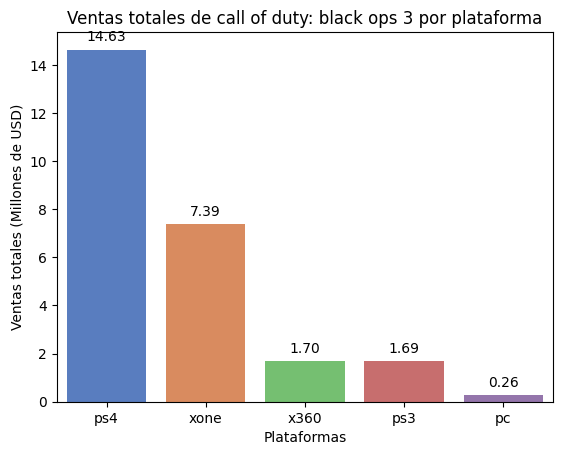

In [64]:
# Crear grafico para las ventas de Call of Duty: Black Ops 3
plot_bar('call of duty: black ops 3',)


*El gráfico muestra las ventas totales del juego Grand Theft Auto V (GTA V) en diferentes plataformas. A continuación, se presentan las ventas en millones de dólares (USD) para cada plataforma:*

  - `PS3:` Alrededor de 21.05 millones de USD.
  - `X360:` Aproximadamente 16.27 millones de USD.
  - `PS4:` Cerca de 12.62 millones de USD.
  - `XOne:` Alrededor de 5.47 millones de USD.
  - `PC:` Aproximadamente 1.17 millones de USD. 

*En resumen, el juego tuvo un gran éxito en las plataformas PS3 y X360, seguido de PS4. Las ventas en PC fueron significativamente más bajas.*

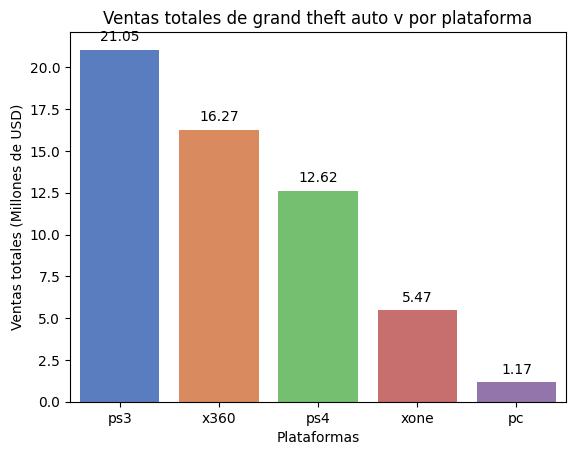

In [65]:
# Crear grafico para las ventas de Grand Theft Auto V
plot_bar('grand theft auto v')

*El gráfico muestra las ventas totales del juego FIFA 16 en diferentes plataformas. A continuación, se presentan las ventas en millones de dólares (USD) para cada plataforma:*

  - `PS4:` Alrededor de 8.5 millones de USD.
  - `XOne:` Aproximadamente 3.25 millones de USD.
  - `PS3:` Cerca de 2.7 millones de USD.
  - `X360:` Alrededor de 1.57 millones de USD.
  - `PC:` Aproximadamente 0.20 millones de USD. 

*En resumen, el juego tuvo un gran éxito en la plataforma PS4, seguido de XOne y PS3. Las ventas en PC fueron significativamente más bajas.*

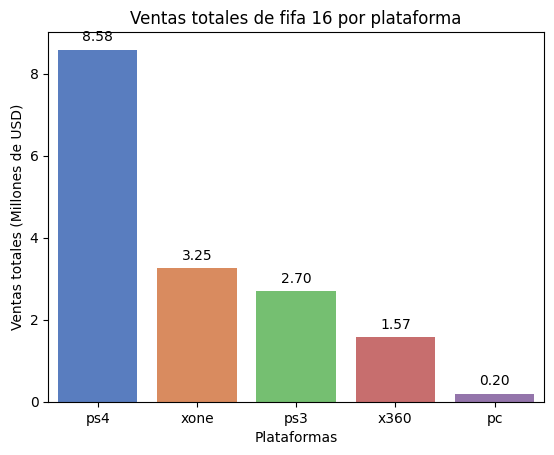

In [66]:
# Crear grafico para las ventas de FIFA 16
plot_bar('fifa 16')

*El gráfico muestra las ventas totales del juego FIFA 17 en diferentes plataformas. A continuación, se presentan las ventas en millones de dólares (USD) para cada plataforma:*

  - `PS4:` Alrededor de 8.5 millones de USD.
  - `XOne:` Aproximadamente 3.25 millones de USD.
  - `PS3:` Cerca de 2.7 millones de USD.
  - `X360:` Alrededor de 1.57 millones de USD.
  - `PC:` Aproximadamente 0.20 millones de USD. 

*En resumen, el juego tuvo un gran éxito en la plataforma PS4, seguido de XOne y PS3. Las ventas en PC fueron significativamente más bajas.*

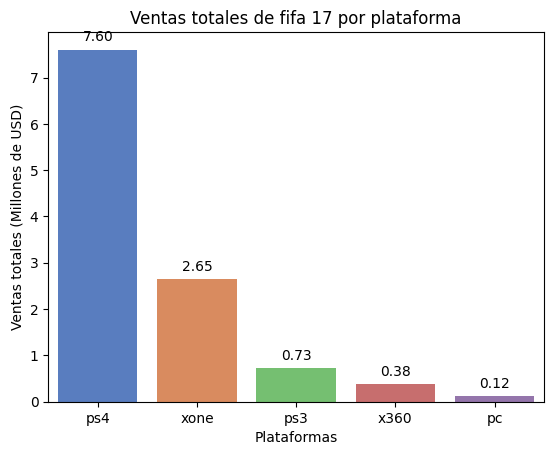

In [67]:
# Crear grafico para las ventas de FIFA 17
plot_bar('fifa 17')

*El gráfico muestra las ventas totales del juego Star Wars Battlefront (2015) en diferentes plataformas. A continuación, se presentan las ventas en millones de dólares (USD) para cada plataforma:*

  - `PS4:` Alrededor de 7.98 millones de USD.
  - `XOne:` Aproximadamente 3.66 millones de USD.
  - `PC:` Cerca de 0.55 millones de USD. 
 
*En resumen, el juego tuvo un gran éxito en la plataforma PS4, seguido de XOne. Las ventas en PC fueron significativamente más bajas.*

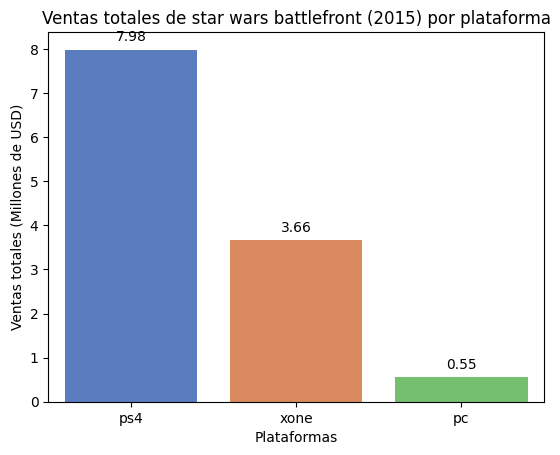

In [68]:
# Crear grafico para las ventas de Star Wars Battlefront (2015)
plot_bar('star wars battlefront (2015)')

*El gráfico muestra las ventas totales del juego Call of Duty: Advanced Warfare en diferentes plataformas. A continuación, se presentan las ventas en millones de dólares (USD) para cada plataforma:*

  - `PS4:` Alrededor de 7.6 millones de USD.
  - `XOne:` Aproximadamente 5.26 millones de USD.
  - `PS3:` Cerca de 4.36 millones de USD.
  - `X360:` Alrededor de 4.28 millones de USD.
  - `PC:` Aproximadamente 0.41 millones de USD. 
 
*En resumen, el juego tuvo un gran éxito en las plataformas PS4 y XOne, seguido de PS3 y X360. Las ventas en PC fueron significativamente más bajas.*

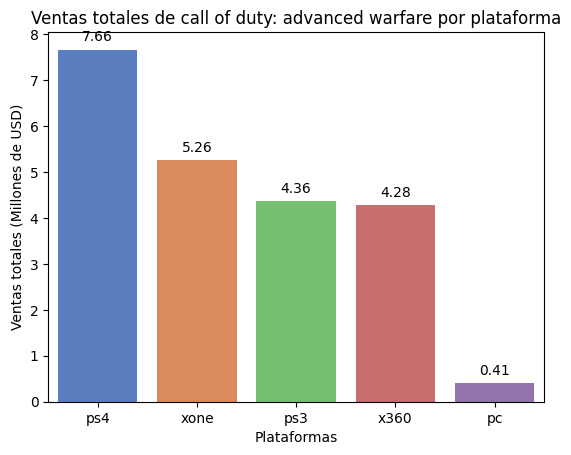

In [69]:
# Crear grafico para las ventas de Call of Duty: Advaced Warfare
plot_bar('call of duty: advanced warfare')

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

🔍 Se filtran todos los juegos lanzados del 2013 al 2016 agrupando por plataforma y por genero dando el resultado de las ventas totales para determinar cual es el genero mas rentable.

In [70]:
# Filtrar por Genero de videojuegos
top_genres = df_games.query('year_of_release >= 2013').groupby(['platform', 'genre'])['total_sales'].sum()
top_genres = top_genres.sort_values(ascending=False)
top_genres = top_genres.reset_index()
top_genres

,platform,genre,total_sales
0,ps4,action,96.10
1,ps4,shooter,88.56
2,ps3,action,70.92
3,3ds,role-playing,67.37
4,xone,shooter,60.33
...,...,...,...
107,ds,sports,0.03
108,ds,adventure,0.03
109,psp,strategy,0.02
110,ps4,puzzle,0.02


  - **Género de Acción:** El género de acción es el más rentable en la mayoría de las plataformas, especialmente en PS4, donde alcanza casi 100 millones de dólares en ventas. También tiene buenas ventas en Xbox One (XOne) y PC.
  - **Género de Disparos (Shooter):** El género de disparos también tiene ventas significativas en PS4 y Xbox One, aunque es menos popular en otras plataformas.
  - **Género de Deportes:** Los juegos de deportes tienen ventas sólidas en PS4 y Xbox One, pero son menos populares en PC y otras plataformas.
  - **Género de Aventura:** Los juegos de aventura tienen ventas bajas en todas las plataformas, con excepción de PS4, donde aún no alcanzan los niveles de géneros como acción o disparos.

*En general, la gráfica muestra que los géneros de acción y disparos son los más rentables en la mayoría de las plataformas, mientras que los géneros de aventura y puzzle tienen ventas más bajas. Esto podría ser útil para profesionales de marketing al decidir en qué géneros invertir para cada plataforma.*

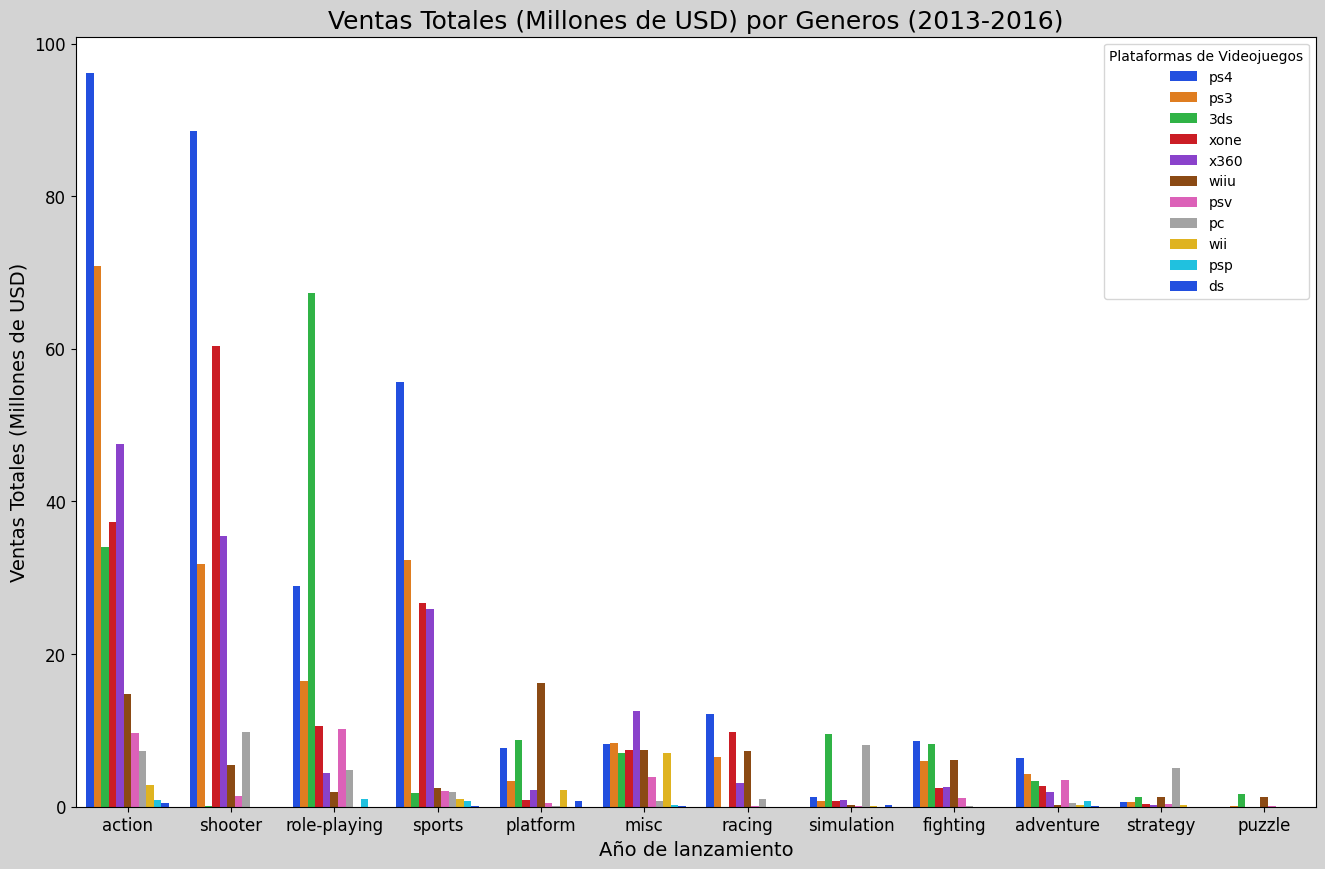

In [71]:
# Crear grafica de barras con las ventas de cada plataforma por genero
sns.set_palette('bright')
plt.figure(figsize=(16,10), facecolor='lightgray')

sns.barplot(data=top_genres,
             x='genre',
             y='total_sales',
             hue='platform',
             palette='bright',             
            )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Año de lanzamiento', fontsize=14)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize=14)
plt.title('Ventas Totales (Millones de USD) por Generos (2013-2016)', fontsize=18)
plt.legend(loc='upper right', title='Plataformas de Videojuegos')

plt.show()

Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

  - Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

🔍 Se haran varios filtros para las regiones de Norte America, Union Europea, Japon y Otras Regiones para determinar las variaciones de las ventas de los videojuegos por cada plataforma en dichas regiones.

In [72]:
# Filtrar por ventas en Norte America
df_na_sales = df_games.query('year_of_release >= 2013').groupby('platform')['na_sales'].sum()
df_na_sales = df_na_sales.sort_values(ascending=False).reset_index()

df_na_sales

,platform,na_sales
0,ps4,108.74
1,xone,93.12
2,x360,81.66
3,ps3,63.50
4,3ds,38.20
5,wiiu,29.21
6,pc,11.11
7,wii,6.56
8,psv,5.04
9,ds,0.57


In [73]:
# Filtrar por ventas en la Union Europea
df_eu_sales = df_games.query('year_of_release >= 2013').groupby('platform')['eu_sales'].sum()
df_eu_sales = df_eu_sales.sort_values(ascending=False).reset_index()

df_eu_sales

,platform,eu_sales
0,ps4,141.09
1,ps3,67.81
2,xone,51.59
3,x360,42.52
4,3ds,30.96
5,pc,25.36
6,wiiu,19.85
7,psv,6.10
8,wii,5.93
9,ds,0.85


In [74]:
# Filtrar por ventas en Japon
df_jp_sales = df_games.query('year_of_release >= 2013').groupby('platform')['jp_sales'].sum()
df_jp_sales = df_jp_sales.sort_values(ascending=False).reset_index()

df_jp_sales

,platform,jp_sales
0,3ds,67.81
1,ps3,23.35
2,psv,18.59
3,ps4,15.96
4,wiiu,10.88
5,psp,3.29
6,x360,0.51
7,xone,0.34
8,wii,0.05
9,ds,0.00


In [75]:
# Filtrar por ventas en Otras Regiones
df_other_sales = df_games.query('year_of_release >= 2013').groupby('platform')['other_sales'].sum()
df_other_sales = df_other_sales.sort_values(ascending=False).reset_index()

df_other_sales

,platform,other_sales
0,ps4,48.35
1,ps3,26.77
2,xone,14.27
3,x360,12.11
4,3ds,6.28
5,wiiu,4.69
6,psv,3.26
7,pc,2.96
8,wii,1.12
9,ds,0.12


# Norteamérica (NA):
  - La plataforma PS4 lidera en ventas en Norteamérica, con una considerable ventaja sobre otras plataformas.
  - Xbox One (XOne) también tiene buenas ventas, aunque significativamente más bajas que PS4.
  - Las otras tres plataformas (3DS, PSV y WiiU) tienen ventas mucho más bajas en esta región.

# Europa (UE):
  - Al igual que en Norteamérica, PS4 domina las ventas en Europa.
  - Xbox One (XOne) sigue en segundo lugar, pero con una brecha considerable.
  - Las otras tres plataformas (3DS, PSV y WiiU) nuevamente tienen ventas más bajas.

# Japón (JP):
  - En Japón, la plataforma 3DS es la más popular en términos de ventas, superando a PS4.
  - PSV también tiene ventas decentes en esta región.
  - Las otras tres plataformas (PS4, XOne y WiiU) tienen ventas más bajas en comparación.

# Otras regiones:
  - PS4 sigue siendo la líder en ventas en otras regiones, aunque la brecha con Xbox One (XOne) es más estrecha.
  - Las otras tres plataformas (3DS, PSV y WiiU) nuevamente tienen ventas más bajas en esta categoría.

*En resumen, PS4 es la plataforma más exitosa en términos de ventas en todas las regiones, pero las preferencias varían según la ubicación geográfica.*

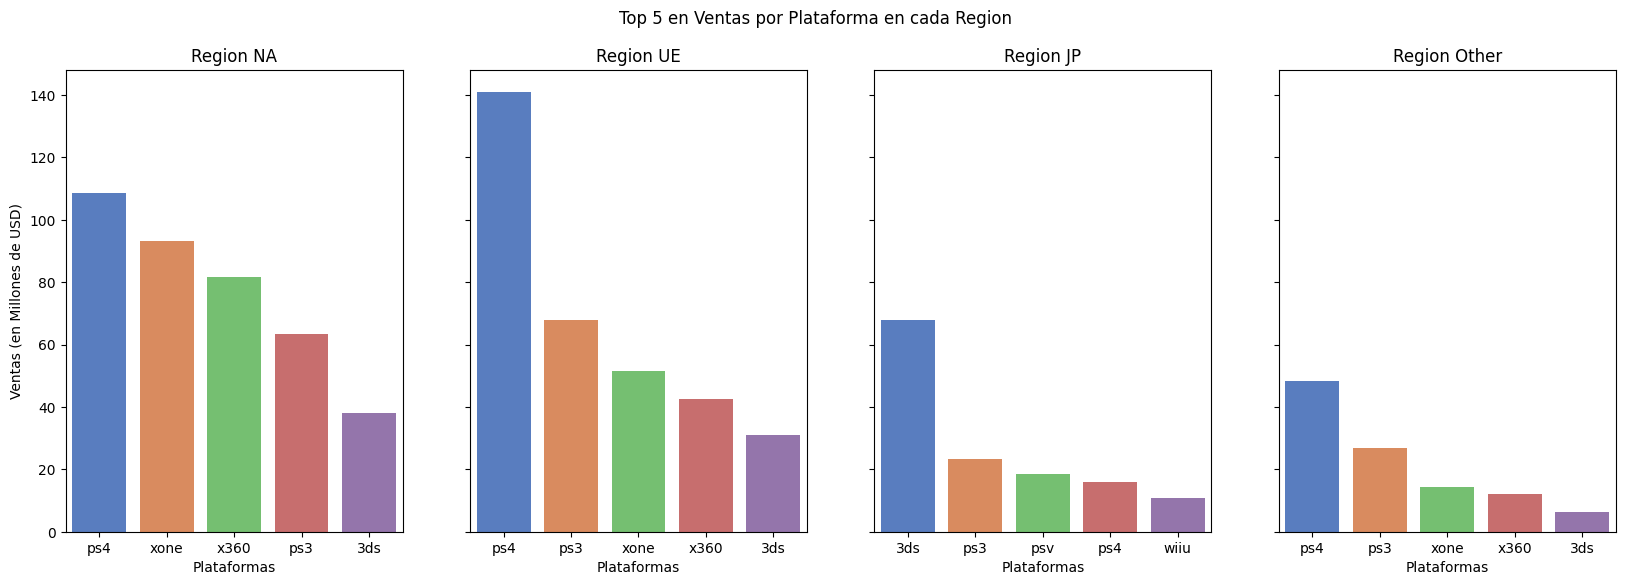

In [76]:
# Crear graficas de barras por plataforma en cada una de las regiones
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Top 5 en Ventas por Plataforma en cada Region')

# 
sns.barplot(ax=axes[0], data=df_na_sales.head(5), x='platform', y='na_sales', palette='muted')
axes[0].set(title='Region NA',
       xlabel='Plataformas', 
       ylabel='Ventas (en Millones de USD)')

# 
sns.barplot(ax=axes[1], data=df_eu_sales.head(5), x='platform', y='eu_sales', palette='muted')
axes[1].set(title='Region UE',
       xlabel='Plataformas', 
       ylabel='Ventas (en Millones de USD)')

# 
sns.barplot(ax=axes[2], data=df_jp_sales.head(5), x='platform', y='jp_sales', palette='muted')
axes[2].set(title='Region JP',
       xlabel='Plataformas', 
       ylabel='Ventas (en Millones de USD)')

# 
sns.barplot(ax=axes[3], data=df_other_sales.head(5), x='platform', y='other_sales', palette='muted')
axes[3].set(title='Region Other',
       xlabel='Plataformas', 
       ylabel='Ventas (en Millones de USD)')

plt.show()

  - Los cinco géneros principales. Explica la diferencia.

🔍 Se aplicara el mismo metodo realizado anteriormente pero esta vez con los generos, para determinar el genero mas rentable por cada una de las mismas regiones.

In [77]:
# Filtrar ventas de Norte America por genero
df_na_sales = df_games.query('year_of_release >= 2013').groupby('genre')['na_sales'].sum()
df_na_sales = df_na_sales.sort_values(ascending=False).reset_index()

df_na_sales

,genre,na_sales
0,action,126.05
1,shooter,109.74
2,sports,65.27
3,role-playing,46.40
4,misc,27.49
5,platform,18.14
6,fighting,15.55
7,racing,12.96
8,adventure,7.14
9,simulation,4.86


In [78]:
# Filtrar ventas de la Union Europea por genero
df_eu_sales = df_games.query('year_of_release >= 2013').groupby('genre')['eu_sales'].sum()
df_eu_sales = df_eu_sales.sort_values(ascending=False).reset_index()

df_eu_sales

,genre,eu_sales
0,action,118.13
1,shooter,87.86
2,sports,60.52
3,role-playing,36.97
4,racing,20.19
5,misc,20.04
6,platform,15.58
7,simulation,10.92
8,fighting,8.55
9,adventure,8.25


In [79]:
# Filtrar ventas de Japon por genero
df_jp_sales = df_games.query('year_of_release >= 2013').groupby('genre')['jp_sales'].sum()
df_jp_sales = df_jp_sales.sort_values(ascending=False).reset_index()

df_jp_sales

,genre,jp_sales
0,role-playing,51.04
1,action,40.49
2,misc,9.20
3,fighting,7.65
4,shooter,6.61
5,adventure,5.82
6,sports,5.41
7,platform,4.79
8,simulation,4.52
9,racing,2.30


In [80]:
# Filtrar ventas de Otras Regiones por genero
df_other_sales = df_games.query('year_of_release >= 2013').groupby('genre')['other_sales'].sum()
df_other_sales = df_other_sales.sort_values(ascending=False).reset_index()

df_other_sales

,genre,other_sales
0,action,37.20
1,shooter,28.77
2,sports,19.45
3,role-playing,11.48
4,misc,6.09
5,racing,4.44
6,platform,4.12
7,fighting,3.56
8,adventure,2.43
9,simulation,1.46


# Norteamérica (NA):
  - El género de acción lidera en ventas en Norteamérica, seguido de cerca por el género de disparos (shooter).
  - Los géneros de deportes y juegos de rol (role-playing) también tienen buenas ventas en esta región.
  - El género misceláneo tiene ventas más bajas en comparación.

# Europa (UE):
  - En Europa, el género de acción sigue siendo el más popular en términos de ventas.
  - Los géneros de disparos y deportes también tienen ventas sólidas en esta región.
  - Los géneros de juegos de rol y misceláneos tienen ventas más bajas.

# Japón (JP):
  - En Japón, el género de juegos de rol es el más exitoso en ventas, superando a los demás géneros.
  - Los géneros de acción y misceláneos también tienen ventas decentes en esta región.
  - Los géneros de deportes y disparos tienen ventas más bajas.

# Otras regiones:
  - En otras regiones, el género de acción sigue siendo el líder en ventas.
  - Los géneros de disparos, deportes y juegos de rol también tienen buenas ventas.
  - El género misceláneo tiene ventas más bajas en esta categoría.

*En resumen, las preferencias de género varían según la ubicación geográfica, pero los géneros de acción y disparos son consistentemente populares en todas las regiones.*

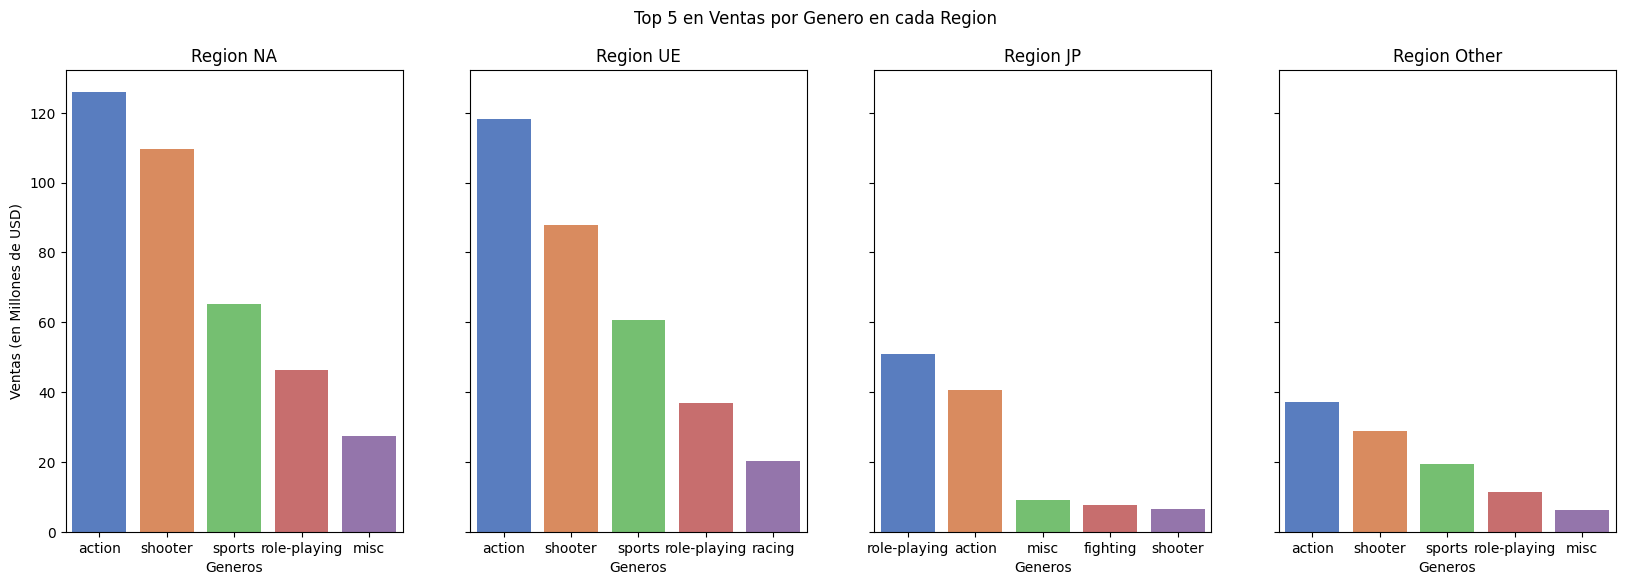

In [81]:
# Especificciones de las subgraficas
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('Top 5 en Ventas por Genero en cada Region')

# Grafica de Norte America
sns.barplot(ax=axes[0], data=df_na_sales.head(5), x='genre', y='na_sales', palette='muted')
axes[0].set(title='Region NA',
       xlabel='Generos', 
       ylabel='Ventas (en Millones de USD)')

# Grafica de la Union Europea
sns.barplot(ax=axes[1], data=df_eu_sales.head(5), x='genre', y='eu_sales', palette='muted')
axes[1].set(title='Region UE',
       xlabel='Generos', 
       ylabel='Ventas (en Millones de USD)')

# Grafica de Japon
sns.barplot(ax=axes[2], data=df_jp_sales.head(5), x='genre', y='jp_sales', palette='muted')
axes[2].set(title='Region JP',
       xlabel='Generos', 
       ylabel='Ventas (en Millones de USD)')

# Grafica de Otras Regiones
sns.barplot(ax=axes[3], data=df_other_sales.head(5), x='genre', y='other_sales', palette='muted')
axes[3].set(title='Region Other',
       xlabel='Generos', 
       ylabel='Ventas (en Millones de USD)')

plt.show()

  - Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

🔍 Se va a filtrar esta vez por cada region las clasificaciones ESRB para ver si estas afectan las ventas en las regiones correspondientes.

In [82]:
# Filtrar por clasificacion ESRB las ventas de Norte America
df_na_sales = df_games.query('year_of_release >= 2013').groupby('esrb_rating')['na_sales'].sum()
df_na_sales = df_na_sales.reset_index()

df_na_sales

,esrb_rating,na_sales
0,e,79.05
1,e10+,54.24
2,m,165.21
3,rp,89.42
4,t,49.79


In [83]:
# Filtrar por clasificacion ESRB las ventas de la Union Europea
df_eu_sales = df_games.query('year_of_release >= 2013').groupby('esrb_rating')['eu_sales'].sum()
df_eu_sales = df_eu_sales.reset_index()

df_eu_sales

,esrb_rating,eu_sales
0,e,83.36
1,e10+,42.69
2,m,145.32
3,rp,78.91
4,t,41.95


In [84]:
# Filtrar por clasificacion ESRB las ventas de Japon 
df_jp_sales = df_games.query('year_of_release >= 2013').groupby('esrb_rating')['jp_sales'].sum()
df_jp_sales = df_jp_sales.reset_index()

df_jp_sales

,esrb_rating,jp_sales
0,e,15.14
1,e10+,5.89
2,m,14.11
3,rp,85.05
4,t,20.59


In [85]:
# Filtrar por clasificacion ESRB las ventas de Otras Regiones
df_other_sales = df_games.query('year_of_release >= 2013').groupby('esrb_rating')['other_sales'].sum()
df_other_sales = df_other_sales.reset_index()

df_other_sales

,esrb_rating,other_sales
0,e,22.61
1,e10+,12.57
2,m,47.04
3,rp,23.46
4,t,14.29


# Norteamérica (NA):
  - La clasificación “M” para Maduros (Mature) lidera en ventas en Norteamérica, seguida de cerca por la clasificación “E” para Todos (Everyone).
  - La clasificación “RP” también tiene buenas ventas en esta región.
  - Las clasificaciones “E10+” para Todos de 10 años en adelante y “T” tienen ventas más bajas.

# Europa (UE):
  - En Europa, la clasificación “M” para Maduros sigue siendo la más popular en términos de ventas.
  - La clasificación “E” y “RP” también tiene buenas ventas en esta región.
  - Las clasificaciones “T” para Adolescentes, “E10+” para Todos de 10 años en adelante tienen ventas más bajas.
# Japón (JP):
  - En Japón, la clasificación “RP” es la más exitosa en ventas, superando a las demás clasificaciones.
  - La clasificación “T” para Adolescentes también tiene ventas decentes en esta región.
  - Las clasificaciones “M” para Maduros, “E” para Todos de 10 años en adelante y “E10+” tienen ventas más bajas.
# Otras regiones:
  - En otras regiones, la clasificación “M” para Maduros sigue siendo la líder en ventas.
  - Las clasificaciones “RP”, “E” y “T” para Todos de 10 años en adelante también tienen buenas ventas.
  - La clasificación “E10+” tiene ventas más bajas en esta categoría.

*En resumen, las preferencias de clasificación ESRB varían según la ubicación geográfica, pero las clasificaciones “M” y “E” para Adolescentes son consistentemente populares en todas las regiones.*

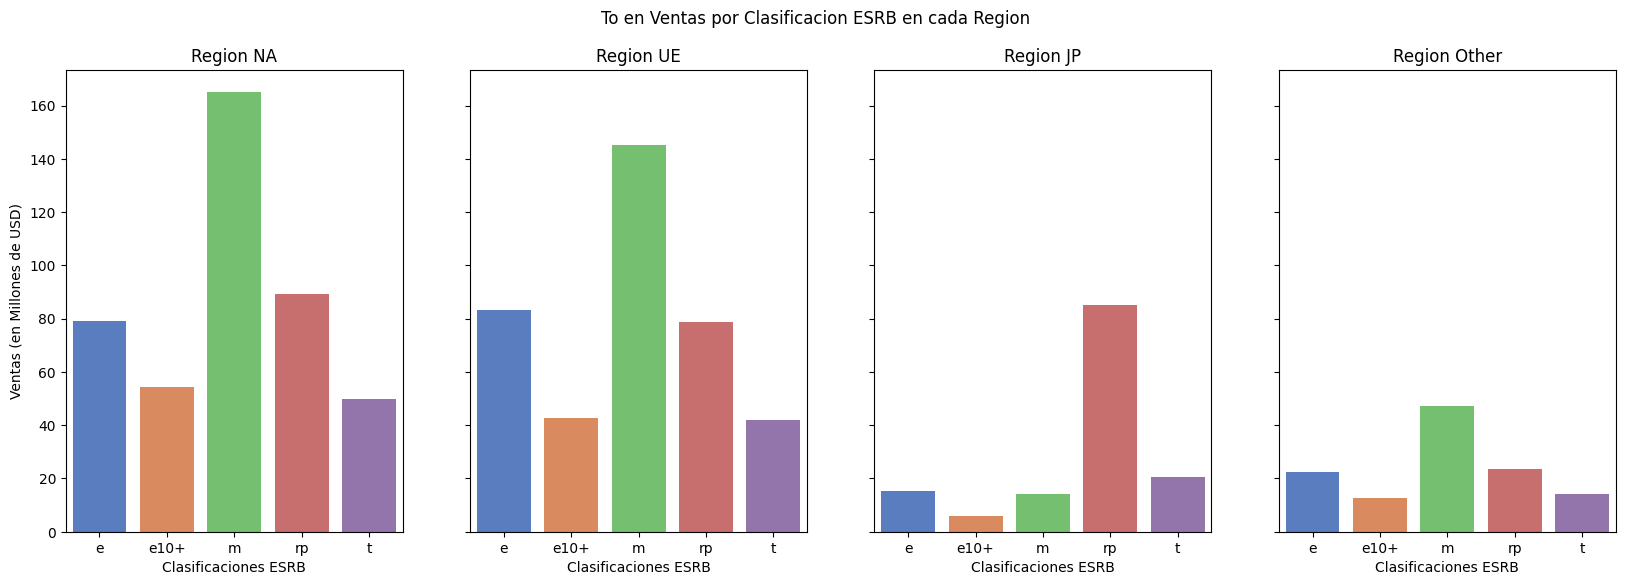

In [86]:
# Especificaciones de las subgraficas
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle('To en Ventas por Clasificacion ESRB en cada Region')

# Grafica de Norte America
sns.barplot(ax=axes[0], data=df_na_sales, x='esrb_rating', y='na_sales', palette='muted')
axes[0].set(title='Region NA',
       xlabel='Clasificaciones ESRB', 
       ylabel='Ventas (en Millones de USD)')

# Grafica de la Union Europea
sns.barplot(ax=axes[1], data=df_eu_sales, x='esrb_rating', y='eu_sales', palette='muted')
axes[1].set(title='Region UE',
       xlabel='Clasificaciones ESRB', 
       ylabel='Ventas (en Millones de USD)')

# Grafica de Japon
sns.barplot(ax=axes[2], data=df_jp_sales, x='esrb_rating', y='jp_sales', palette='muted')
axes[2].set(title='Region JP',
       xlabel='Clasificaciones ESRB', 
       ylabel='Ventas (en Millones de USD)')

# Grafica de Otras Regiones
sns.barplot(ax=axes[3], data=df_other_sales, x='esrb_rating', y='other_sales', palette='muted')
axes[3].set(title='Region Other',
       xlabel='Clasificaciones ESRB', 
       ylabel='Ventas (en Millones de USD)')

plt.show()

Paso 5. Prueba las siguientes hipótesis: 
 
 Establece tu mismo el valor de umbral alfa.

  - Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?.

In [87]:
# Filtrar por XboxOne las reseñas de los usuarios
xone_per_score = df_games.query('platform == "xone"')['user_score']
xone_per_score = xone_per_score.dropna()

xone_per_score

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16521    6.8
16574    6.0
16607    8.2
16620    6.6
16637    6.7
Name: user_score, Length: 182, dtype: float64

In [88]:
# Filtrar por PC las reseñas de los usuarios
pc_per_score = df_games.query('year_of_release >= 2013 & platform == "pc"')['user_score']
pc_per_score = pc_per_score.dropna()

pc_per_score

458      3.9
1094     7.9
1349     2.2
1435     6.0
1528     5.4
        ... 
16433    8.3
16440    6.8
16486    7.9
16495    1.4
16669    7.6
Name: user_score, Length: 155, dtype: float64

  -  Cómo formulaste las hipótesis nula y alternativa.

  - Hipótesis Nula (H0): Supongamos que las calificaciones promedio de los usuarios para Xbox One y PC son iguales. En otras palabras, no hay una diferencia significativa entre las dos plataformas.

  - Hipótesis Alternativa (H1): Creemos que hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC. Las medias poblacionales no son iguales.

  - Interpretación del p-valor: El p-valor es como una señal de alerta. Si es muy pequeño (menor que nuestro valor de alpha, que es 0.05 en este caso), rechazamos la idea de que las calificaciones son iguales. Pero en nuestro caso, el p-valor es 0.1401, lo que significa que no tenemos suficiente evidencia para decir que hay una diferencia real entre las calificaciones de Xbox One y PC. Así que no podemos rechazar la idea de que son iguales.

In [89]:
# Determinar si rechazar o no la hipotesis nula 
alpha = 0.05

results = st.ttest_ind(xone_per_score, pc_per_score)

print('alpha:', alpha)
print('p-value:', results.pvalue)
print()

if results.pvalue < alpha:
    print('Podemos rehcazar la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')


alpha: 0.05
p-value: 0.14012658403611647

No podemos rechazar la hipotesis nula


  - Qué criterio utilizaste para probar las hipótesis y por qué.

*Para probar las hipótesis sobre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC, utilicé un enfoque estadístico llamado prueba t de dos muestras. Permíteme explicarte por qué elegí este criterio:*

  - Prueba t de dos muestras:
    - La prueba t de dos muestras es una herramienta común en estadística para comparar las medias de dos grupos diferentes.
    - En nuestro caso, tenemos dos grupos de datos: las calificaciones de los usuarios para Xbox One y las calificaciones de los usuarios para PC.
    - Queremos saber si hay una diferencia significativa entre las calificaciones promedio de estos dos grupos.
  - ¿Por qué la prueba t de dos muestras?:
    - La elección de esta prueba se basa en la naturaleza de nuestros datos y el objetivo de la investigación.
    - Queremos comparar dos muestras independientes (Xbox One y PC) y determinar si sus medias son realmente diferentes o si cualquier diferencia observada podría deberse al azar.
    - La prueba t de dos muestras nos permite evaluar si la diferencia entre las medias es estadísticamente significativa o simplemente el resultado de la variabilidad natural en los datos.
  - Interpretación del resultado:
    - Calculamos las medias de las calificaciones de los usuarios para Xbox One y PC.
    - Luego, realizamos la prueba t para determinar si la diferencia entre estas medias es lo suficientemente grande como para rechazar la hipótesis nula (que asume que las medias son iguales).
    - El p-valor obtenido (0.1401) no es lo suficientemente pequeño como para rechazar la hipótesis nula. Por lo tanto, no tenemos suficiente evidencia para afirmar que hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC. 

*En resumen, elegí la prueba t de dos muestras porque es una herramienta estándar para comparar medias en situaciones como esta. Además, el p-valor nos ayuda a tomar una decisión informada sobre si rechazar o no la hipótesis nula. En este caso, no encontramos suficiente evidencia para rechazarla.*

In [90]:
# Determinar la media de las reseñas de XboxOne y PC
xone_per_score_mean = np.mean(xone_per_score)
pc_per_score_mean = np.mean(pc_per_score)

print(f'La media de las reseñas por usuario en Xbox One es de: {xone_per_score_mean:.2}')
print(f'La media de las reseñas por usuario de PC es de: {pc_per_score_mean:.2}')

La media de las reseñas por usuario en Xbox One es de: 6.5
La media de las reseñas por usuario de PC es de: 6.3


  - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?.

In [91]:
# Filtrar reseñas de usuarios por el genero de Action
action_per_score = df_games.query('genre == "action"')['user_score']
action_per_score = action_per_score.dropna()

action_per_score

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16629    8.5
16631    5.1
16637    6.7
16640    2.4
16669    7.6
Name: user_score, Length: 1826, dtype: float64

In [92]:
# Filtrar reseñas de usuarios por el genero de Sports
sports_per_score = df_games.query('genre == "sports"')['user_score']
sports_per_score = sports_per_score.dropna()

sports_per_score

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16427    4.5
16495    1.4
16505    6.9
16523    9.5
16620    6.6
Name: user_score, Length: 1102, dtype: float64

  -  Cómo formulaste las hipótesis nula y alternativa.

# Resultados de la Prueba:

  - El valor de p (p-valor) obtenido es 0.1111.
  - Nuestro nivel de significancia (alfa) es 0.05.

**Interpretación:**

  - Si el p-valor fuera menor que alfa (0.05), podríamos rechazar la hipótesis nula.
  - Sin embargo, en este caso, el p-valor es mayor que alfa (0.1111).
  - Por lo tanto, no tenemos suficiente evidencia para rechazar la hipótesis nula. 

*Esto significa que no podemos afirmar con confianza que haya una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de acción y deportes.*

In [93]:
# Determianr si rechazar o no la hipotesis nula
alpha = 0.05

results = st.ttest_ind(action_per_score, sports_per_score)

print('alpha:', alpha)
print('p-values:', results.pvalue)
print()

if results.pvalue < alpha:
    print('Podemos rechazar la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

alpha: 0.05
p-values: 0.11109512501606582

No podemos rechazar la hipotesis nula


  - Qué criterio utilizaste para probar las hipótesis y por qué.

# Interpretación del resultado:

  - Calculamos las medias de las calificaciones de los usuarios para ambos géneros.
  - Luego, realizamos la prueba t para determinar si la diferencia entre estas medias es lo suficientemente grande como para rechazar la hipótesis nula (que asume que las medias son iguales).
  - El p-valor obtenido (0.1111) no es lo suficientemente pequeño como para rechazar la hipótesis nula. Por lo tanto, no tenemos suficiente evidencia para afirmar que hay una diferencia significativa entre las calificaciones promedio de los usuarios en los géneros “Action” y “Sports”.

In [94]:
# Determianr la media de las reseñas de los usuarios por ambos generos
action_per_score_mean = np.mean(action_per_score)
sports_per_score_mean = np.mean(sports_per_score)

print(f'La media de las reseñas por usuario en el genero "Action" es de: {action_per_score_mean:.2}')
print(f'La media de las reseñas por usuario en el genero "Sports" es de: {sports_per_score_mean:.2}')

La media de las reseñas por usuario en el genero "Action" es de: 7.1
La media de las reseñas por usuario en el genero "Sports" es de: 7.0


Paso 6. Escribe una conclusión general

### Datos de Plataformas 🎮

La base de datos incluye una amplia gama de plataformas de juegos, siendo **PlayStation 2 (PS2)** y **Nintendo DS (DS)** las más prevalentes.

Plataformas populares como **PlayStation 3 (PS3)**, **Wii**, **Xbox 360 (X360)** y **PlayStation Portable (PSP)** también están bien representadas.

### Datos de Año de Lanzamiento 📅

Los datos abarcan lanzamientos de juegos desde **1977** hasta **2016**, con un mayor número de lanzamientos en la década de **2000 a principios de 2010**.

Esto indica un período activo para los lanzamientos de juegos durante ese tiempo, mientras que los años anteriores tienen relativamente menos lanzamientos.

### Datos de Género 🎭

La base de datos incluye una variedad de géneros de juegos, siendo **“Acción”** el más común.

Otros géneros populares incluyen **“Deportes”**, **“Rol”**, **“Shooters”** y **“Misceláneos”**.

Géneros como **“Aventura”**, **“Carreras”**, **“Simulación”** y **“Plataforma”** también tienen una presencia significativa.

### Datos de Clasificación ESRB 📊

Los juegos tienen diversas clasificaciones ESRB, siendo **“RP”** (*Rating Pending*) la más común.

**“E”** (*Everyone*) y **“T”** (*Teens*) también son prevalentes.

Clasificaciones menos comunes incluyen **“E10+”** (*Para Todos de 10 años en adelante*) y **“M”** (*Mature*).

### Número de Juegos Lanzados 🚀

El número de juegos lanzados ha aumentado con el tiempo, con el aumento significativo en la década de **1990 a principios de 2000**. El máximo número de juegos se lanzó en **2008** y **2009**.

### Variación de Ventas de Plataforma a Plataforma 💹

**PlayStation 2 (PS2)** tiene las ventas totales más altas, seguida de **Xbox 360 (X360)** y **PlayStation 3 (PS3)**. Algunas plataformas, como **DS**, **PS**, **PS2**, **PS3**, **Wii** y **X360**, solían ser populares pero ahora tienen ventas nulas.

### Duración de las Plataformas y Ventas Máximas ⏳

Las consolas más nuevas tienden a generar ventas significativas y alcanzar sus ventas máximas más rápido que las consolas más antiguas. Las plataformas más nuevas tardaron alrededor de **3-4 años** en establecer una presencia significativa, mientras que las más antiguas tardaron alrededor de **7-10 años**.

### Plataformas Potencialmente Rentables (2013-2016) 💰

**PS4** y **Xbox One (XOne)** se identificaron como plataformas potencialmente rentables durante el período especificado. **PS3** también mantuvo cifras de ventas notables. **PC** tuvo ventas estables hasta **2016**.

### Ventas Globales de Juegos por Plataforma 🌍

Los datos de ventas varían según las plataformas, con diferentes distribuciones y niveles de consistencia. **PS4** tiene las ventas promedio más altas, seguida de **Xbox One (XOne)** y **PS3**.

### Efecto de las Reseñas en las Ventas 📈

**PS4**, **XOne** y **Wii U** muestran una correlación positiva moderada entre las puntuaciones de los críticos y las ventas totales, lo que indica que las reseñas positivas influyen en las ventas hasta cierto punto.

### Ventas de los Mismos Juegos en Otras Plataformas 💻

Los juegos que fueron los más vendidos en **PS4** tuvieron grandes ventas en **XOne** y las peores ventas en **PC**.

### Distribución General de los Géneros 📊

Los géneros de **acción** y **disparos** son los más rentables en términos de ventas totales, mientras que los géneros de **rompecabezas** y **estrategia** tienen ventas más bajas. Los juegos de **disparos**, en promedio, generan los ingresos más altos.

En resumen, la industria de videojuegos es diversa y dinámica, con tendencias cambiantes en las preferencias de los jugadores y el éxito de las plataformas. Estos datos proporcionan información valiosa para desarrolladores.
